In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Lego and their Colours 

Datalink: https://rebrickable.com/downloads/

This dataset includes information on the themes in Lego and their colours. The dataset also have number of pieces in a set as well. As I am only looking at the colours and themes I will be disregarding anything that doesn't pertain to the colour or themes.

So what colour does Lego use the most?

My working theory is that Lego uses more black pieces overall in each of its themes.

## Tables Creation

Here I will be joining my master file to my set file, merging my theme file to itself so I can break up the sub-theme and themes, then merging that to the parts file and finally merging colour into the dataset. I will be cleaning up all the data in the merged file that doesn't correspond to the theme or colour.

In [2]:
master = pd.read_csv('.\\Data\\inventories.csv')
sets = pd.read_csv('.\\Data\\sets.csv')
themes = pd.read_csv('.\\Data\\themes.csv')
parts = pd.read_csv('.\\Data\\inventory_parts.csv')
colours = pd.read_csv('.\\Data\\colors.csv')

In [3]:
master.info() # check for Nans and see what the columns are

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32241 entries, 0 to 32240
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       32241 non-null  int64 
 1   version  32241 non-null  int64 
 2   set_num  32241 non-null  object
dtypes: int64(2), object(1)
memory usage: 755.8+ KB


I can see that there is a version column, I don't need that so I am removing it before I even merge the files. Also renaming id to inventory ID so that way it is clear as to what ID is about.

In [4]:
master = master.drop(columns=['version']).rename(columns={'id':'inventory_id'})
master

,inventory_id,set_num
0,1,7922-1
1,3,3931-1
2,4,6942-1
3,15,5158-1
4,16,903-1
...,...,...
32236,134074,fig-012511
32237,134163,fig-012512
32238,134174,6401988-1
32239,134185,76207-1


In [5]:
sets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18947 entries, 0 to 18946
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   set_num    18947 non-null  object
 1   name       18947 non-null  object
 2   year       18947 non-null  int64 
 3   theme_id   18947 non-null  int64 
 4   num_parts  18947 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 740.2+ KB


There are multiple columns in this dataset called 'name' and I know I will not be looking at set names so I am dropping it here before I merge it so my columns don't get all weird names.

In [6]:
sets = sets.drop(columns=['name'])
sets

,set_num,year,theme_id,num_parts
0,001-1,1965,1,43
1,0011-2,1979,67,12
2,0011-3,1987,199,0
3,0012-1,1979,143,12
4,0013-1,1979,143,12
...,...,...,...,...
18942,XWING-1,2019,158,60
18943,XWING-2,2019,158,52
18944,YODACHRON-1,2013,158,413
18945,YTERRIER-1,2018,598,0


In [7]:
themes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445 entries, 0 to 444
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         445 non-null    int64  
 1   name       445 non-null    object 
 2   parent_id  307 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 10.6+ KB


Rename ID to theme_id so that way I can see what ID is about.

In [8]:
themes = themes.rename(columns={'id':'theme_id'})

In [9]:
colours.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216 entries, 0 to 215
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        216 non-null    int64 
 1   name      216 non-null    object
 2   rgb       216 non-null    object
 3   is_trans  216 non-null    object
dtypes: int64(1), object(3)
memory usage: 6.9+ KB


Renaming id to colour id so that way I know what it is, also renaming name to colour so that way it is clearer and easier to understand.

In [10]:
colours = colours.rename(columns={'id':'color_id','name':'colour'})

### Start merging all my files now.

In [11]:
df1 = pd.merge(master, sets, how='left', on='set_num')

In [12]:
df1.head()

,inventory_id,set_num,year,theme_id,num_parts
0,1,7922-1,2004.0,460.0,5.0
1,3,3931-1,2012.0,494.0,43.0
2,4,6942-1,1999.0,134.0,20.0
3,15,5158-1,1990.0,443.0,2.0
4,16,903-1,1969.0,371.0,10.0


Okay, so I ran into a problem with trying to extract the theme from the dataset as it was all merged. So I have merged it back to itself and dropped the unneeded columns and renamed my columns to something that makes sense. I filled all my not a values with the sub-theme which for the parent theme it is. So I had a bit of a headache figuring out this and making it all work and look nice.

In [13]:
df_themes = pd.merge(themes, themes, how='left',left_on='parent_id',right_on='theme_id').drop(columns=['parent_id_x','theme_id_y','parent_id_y']).rename(columns={'theme_id_x':'theme_id','name_x':'sub-theme','name_y':'theme'})
df_themes['theme'].fillna(df_themes['sub-theme'], inplace=True)

In [14]:
df_themes.head()

,theme_id,sub-theme,theme
0,1,Technic,Technic
1,3,Competition,Technic
2,4,Expert Builder,Technic
3,16,RoboRiders,Technic
4,17,Speed Slammers,Technic


In [15]:
df2 = pd.merge(df1, df_themes, how='left', on='theme_id')

In [16]:
df2.head()

,inventory_id,set_num,year,theme_id,num_parts,sub-theme,theme
0,1,7922-1,2004.0,460.0,5.0,Gravity Games,Sports
1,3,3931-1,2012.0,494.0,43.0,Friends,Friends
2,4,6942-1,1999.0,134.0,20.0,Insectoids,Space
3,15,5158-1,1990.0,443.0,2.0,Service Packs,Service Packs
4,16,903-1,1969.0,371.0,10.0,Supplemental,System


In [17]:
df3 = pd.merge(df2, parts, how='left', on='inventory_id')

In [18]:
df3.head()

,inventory_id,set_num,year,theme_id,num_parts,sub-theme,theme,part_num,color_id,quantity,is_spare
0,1,7922-1,2004.0,460.0,5.0,Gravity Games,Sports,48379c01,72.0,1.0,f
1,1,7922-1,2004.0,460.0,5.0,Gravity Games,Sports,48395,7.0,1.0,f
2,1,7922-1,2004.0,460.0,5.0,Gravity Games,Sports,stickerupn0077,9999.0,1.0,f
3,1,7922-1,2004.0,460.0,5.0,Gravity Games,Sports,upn0342,0.0,1.0,f
4,1,7922-1,2004.0,460.0,5.0,Gravity Games,Sports,upn0350,25.0,1.0,f


In [19]:
df = pd.merge(df3, colours, how='left', on='color_id')

## Cleaning Data

If there are not any values in the column colours or themes, then they will be removed from the dataset. Also, only goalies that have played sixty minutes or more will be included as sixty minutes is a game played.

In [20]:
df.head()

,inventory_id,set_num,year,theme_id,num_parts,sub-theme,theme,part_num,color_id,quantity,is_spare,colour,rgb,is_trans
0,1,7922-1,2004.0,460.0,5.0,Gravity Games,Sports,48379c01,72.0,1.0,f,Dark Bluish Gray,6C6E68,f
1,1,7922-1,2004.0,460.0,5.0,Gravity Games,Sports,48395,7.0,1.0,f,Light Gray,9BA19D,f
2,1,7922-1,2004.0,460.0,5.0,Gravity Games,Sports,stickerupn0077,9999.0,1.0,f,[No Color/Any Color],05131D,f
3,1,7922-1,2004.0,460.0,5.0,Gravity Games,Sports,upn0342,0.0,1.0,f,Black,05131D,f
4,1,7922-1,2004.0,460.0,5.0,Gravity Games,Sports,upn0350,25.0,1.0,f,Orange,FE8A18,f


In [21]:
df.drop(df[df['is_spare'] == 't'].index, inplace = True) # don't want spare pieces cluttering up my data

In [22]:
df.isna().sum()

inventory_id        0
set_num             0
year            55668
theme_id        55668
num_parts       55668
sub-theme       55668
theme           55668
part_num         3498
color_id         3498
quantity         3498
is_spare         3498
colour           3498
rgb              3498
is_trans         3498
dtype: int64

So right here I am trying to figure out where all my not a values are coming from. I see that there are equal not a value in each of my datasets that I merged so I have decided to drop them as I need to be able to aggregate on those columns. 

In [23]:
nan_in_col  = df[df['colour'].isna()]
print(nan_in_col)

         inventory_id          set_num    year  theme_id  num_parts  \
66                 19           4444-1  2002.0     462.0        4.0   
457                35        5004559-1  2015.0     601.0        0.0   
710                39          66512-1  2014.0     158.0        0.0   
812                50          K4520-1  1992.0     236.0        0.0   
1964               71          K7690-1  2008.0     137.0        0.0   
...               ...              ...     ...       ...        ...   
1017095        133804        QXI7506-1  2022.0     501.0        0.0   
1017096        133805        QXI7336-1  2022.0     501.0        0.0   
1017097        133806        QXI7576-1  2022.0     501.0        0.0   
1017257        133948  9788325317706-1  2014.0     497.0       10.0   
1017740        134185          76207-1  2022.0     696.0        0.0   

                   sub-theme                theme part_num  color_id  \
66                    Soccer               Sports      NaN       NaN   
457

In [24]:
df = df.dropna(axis=0, subset=['colour','theme'])

In [25]:
df.head()

,inventory_id,set_num,year,theme_id,num_parts,sub-theme,theme,part_num,color_id,quantity,is_spare,colour,rgb,is_trans
0,1,7922-1,2004.0,460.0,5.0,Gravity Games,Sports,48379c01,72.0,1.0,f,Dark Bluish Gray,6C6E68,f
1,1,7922-1,2004.0,460.0,5.0,Gravity Games,Sports,48395,7.0,1.0,f,Light Gray,9BA19D,f
2,1,7922-1,2004.0,460.0,5.0,Gravity Games,Sports,stickerupn0077,9999.0,1.0,f,[No Color/Any Color],05131D,f
3,1,7922-1,2004.0,460.0,5.0,Gravity Games,Sports,upn0342,0.0,1.0,f,Black,05131D,f
4,1,7922-1,2004.0,460.0,5.0,Gravity Games,Sports,upn0350,25.0,1.0,f,Orange,FE8A18,f


In [26]:
df.isna().sum() # okay all squeaky clean now

inventory_id    0
set_num         0
year            0
theme_id        0
num_parts       0
sub-theme       0
theme           0
part_num        0
color_id        0
quantity        0
is_spare        0
colour          0
rgb             0
is_trans        0
dtype: int64

## Answer

Okay so here I answer my question of what colour is used the most, which is black, but there are still some interesting things to look at so let's keep going.

In [27]:
df['colour'].value_counts().head(10)

Black                165288
White                103741
Light Bluish Gray     95803
Dark Bluish Gray      73613
Red                   71983
Yellow                49765
Blue                  39798
Reddish Brown         28070
Light Gray            26570
Tan                   26406
Name: colour, dtype: int64

Interesting, it looks like Gear and Duplo have more unique sets in them. I would've thought that Star Wars would have the most sets made for it. 

In [28]:
df2['theme'].value_counts().head(10)

Gear                       2625
Duplo                      1254
Star Wars                   912
Town                        801
City                        799
Collectible Minifigures     783
System                      746
Service Packs               639
Creator                     612
Educational and Dacta       609
Name: theme, dtype: int64

Let us see how many unique colours are used in each theme.

In [29]:
colourDf = df.groupby('theme').agg(['nunique']).stack().drop(columns=['inventory_id', 'set_num', 'year', 'theme_id', 'num_parts', 'sub-theme', 'part_num', 'color_id', 'quantity', 'is_spare', 'rgb', 'is_trans'])
colourDf.sort_values('colour', ascending=False).head(10)

,,colour
theme,,
Duplo,nunique,115
Gear,nunique,96
Harry Potter,nunique,89
Creator,nunique,88
Educational and Dacta,nunique,88
Belville,nunique,84
Advent,nunique,80
Bionicle,nunique,77
Ninjago,nunique,73


Let us see what the unique colours are used in each theme now.

In [30]:
catColours = df[['theme', 'colour']].value_counts().to_frame()

In [31]:
catColours.head() # not very clear let's see if we can clean this up a little

0
theme     colour                  
Star Wars Light Bluish Gray  17757
Technic   Black              14814
Star Wars Black              13966
          Dark Bluish Gray   13429
City      Black              11173

In [32]:
catColours.groupby('theme').apply(display) # that looks so much better

0
theme     colour                   
4 Juniors Black                 281
          White                 238
          Yellow                120
          Red                   114
          Light Gray            109
          [No Color/Any Color]   93
          Dark Gray              60
          Light Bluish Gray      48
          Reddish Brown          40
          Orange                 38
          Dark Bluish Gray       37
          Blue                   36
          Green                  35
          Trans-Neon Green       27
          Trans-Black            23
          Trans-Dark Blue        23
          Trans-Neon Orange      18
          Chrome Silver          16
          Trans-Medium Blue      14
          Chrome Gold            12
          Trans-Light Blue       10
          Trans-Red               6
          Trans-Yellow            6
          Trans-Clear             4
          Dark Blue               2
          Medium Green            2
          Trans-Green             2
          Bright Green            1
          Sand Green              1
          Tan                     1

0
theme  colour                 
Advent White              1019
       Black               743
       Light Bluish Gray   729
       Red                 530
       Dark Bluish Gray    451
...                        ...
       Olive Green           1
       Nougat                1
       Light Purple          1
       Copper                1
       Trans-Clear Opal      1

[80 rows x 1 columns]

0
theme       colour                   
Adventurers Black                 769
            Light Gray            659
            Dark Gray             458
            Tan                   310
            Red                   292
            Brown                 213
            White                 196
            Yellow                134
            Green                 127
            [No Color/Any Color]  122
            Blue                  118
            Trans-Clear            58
            Trans-Red              27
            Chrome Gold            25
            Trans-Yellow           24
            Trans-Neon Orange      21
            Sand Green             12
            Dark Orange            12
            Dark Blue              12
            Trans-Green            10
            Trans-Neon Green        8
            Trans-Dark Blue         6
            Medium Orange           5
            Bright Green            3
            Chrome Silver           2
            Trans-Light Blue        2
            Dark Bluish Gray        2
            Metallic Gold           1
            Earth Orange            1
            Trans-Black             1
            Chrome Antique Brass    1

0
theme  colour                    
Agents Black                 1103
       Light Bluish Gray      759
       Dark Bluish Gray       652
       White                  216
       Red                    150
       Dark Blue              140
       Orange                  98
       Yellow                  92
       Trans-Light Blue        86
       Blue                    79
       Trans-Red               56
       Flat Silver             50
       Trans-Orange            47
       Tan                     45
       Metallic Silver         41
       Trans-Clear             36
       Lime                    36
       [No Color/Any Color]    30
       Dark Tan                24
       Trans-Neon Green        24
       Trans-Yellow            23
       Pearl Light Gray        22
       Reddish Brown           20
       Trans-Black             19
       Trans-Green             19
       Olive Green             18
       Bright Light Orange     17
       Trans-Neon Orange       17
       Trans-Purple            15
       Green                   14
       Dark Red                13
       Pearl Dark Gray         12
       Trans-Bright Green       9
       Pearl Gold               8
       Dark Brown               7
       Dark Green               6
       Metallic Gold            6
       Dark Purple              4
       Medium Blue              3
       Sand Blue                2
       Trans-Dark Pink          2
       Medium Azure             2
       Trans-Dark Blue          1
       Bright Green             1

0
theme      colour                   
Alpha Team Black                 599
           Yellow                149
           Light Gray            147
           Dark Gray             142
           White                 113
           Light Bluish Gray     106
           Red                    91
           Sand Blue              75
           Dark Blue              56
           Trans-Neon Green       56
           Dark Bluish Gray       52
           Dark Red               52
           Trans-Red              33
           Trans-Medium Blue      23
           Blue                   18
           Trans-Orange           16
           Trans-Neon Orange      16
           Trans-Dark Blue        16
           [No Color/Any Color]   15
           Trans-Clear            15
           Green                  11
           Trans-Black             8
           Tan                     6
           Orange                  2
           Brown                   2
           Chrome Silver           2
           Trans-Green             2
           Purple                  1

0
theme       colour                   
Angry Birds Light Bluish Gray     166
            Dark Bluish Gray      155
            Reddish Brown         123
            Black                 105
            White                  60
            Red                    48
            Tan                    43
            Yellow                 32
            Medium Nougat          26
            Pearl Gold             18
            Dark Tan               17
            Lime                   15
            Green                  15
            Medium Azure           14
            Blue                   14
            Dark Brown              9
            Flat Silver             7
            Dark Purple             7
            Trans-Clear             6
            Dark Green              5
            Magenta                 5
            Bright Pink             5
            Orange                  3
            Trans-Green             3
            [No Color/Any Color]    3
            Trans-Orange            3
            Bright Light Orange     3
            Bright Green            3
            Dark Orange             3
            Medium Blue             2
            Medium Lavender         2
            Dark Pink               2
            Dark Azure              1
            Trans-Yellow            1
            Dark Red                1
            Trans-Red               1
            Pearl Dark Gray         1

0
theme    colour                    
Aquazone Black                 1006
         Yellow                 492
         Blue                   162
         Dark Bluish Gray       150
         Red                    125
         Light Gray             122
         Light Bluish Gray      121
         Dark Gray               75
         Chrome Silver           64
         Trans-Neon Orange       64
         Green                   63
         Trans-Green             56
         Trans-Neon Green        54
         Trans-Dark Blue         29
         White                   27
         Chrome Gold             24
         Dark Blue               20
         Brown                   18
         Reddish Brown           14
         Trans-Light Blue        12
         Trans-Clear             12
         Tan                     10
         Trans-Red               10
         [No Color/Any Color]     8
         Dark Red                 7
         Trans-Black              6
         Dark Green               5
         Light Blue               4
         Glow In Dark Opaque      4
         Pearl Light Gray         4
         Trans-Yellow             3
         Metallic Gold            2
         Trans-Medium Blue        2
         Trans-Dark Pink          2
         Bright Light Orange      2
         Glow In Dark Trans       1

0
theme        colour                   
Architecture White                1120
             Light Bluish Gray     956
             Black                 805
             Tan                   659
             Dark Bluish Gray      351
             Dark Green             93
             Trans-Clear            92
             Red                    88
             Reddish Brown          74
             Yellow                 73
             Sand Green             68
             Blue                   65
             Green                  64
             Dark Tan               62
             Dark Red               55
             Trans-Light Blue       48
             Trans-Black            44
             Orange                 35
             Medium Blue            30
             Dark Blue              27
             Pearl Gold             22
             Bright Green           18
             Olive Green            17
             Dark Orange            17
             Sand Blue              12
             Flat Silver            12
             Lime                   10
             Metallic Gold           7
             Trans-Red               7
             Bright Light Blue       5
             Metallic Silver         5
             Medium Nougat           5
             Trans-Orange            5
             Trans-Dark Blue         5
             Medium Azure            4
             Magenta                 4
             Dark Brown              4
             Trans-Yellow            4
             Bright Pink             3
             Bright Light Yellow     3
             Dark Turquoise          3
             Dark Pink               2
             Trans-Green             2
             Bright Light Orange     2
             Dark Azure              2
             Trans-Bright Green      2
             Trans-Dark Pink         1
             Trans-Neon Green        1

0
theme    colour                   
Atlantis Black                 528
         Red                   407
         Dark Bluish Gray      393
         Light Bluish Gray     264
         White                 110
         Yellow                 76
         Lime                   69
         Tan                    62
         Pearl Gold             59
         Trans-Red              42
         Blue                   41
         Trans-Clear            32
         Dark Tan               28
         Dark Green             27
         [No Color/Any Color]   26
         Trans-Bright Green     24
         Flat Silver            22
         Pearl Light Gray       18
         Trans-Green            18
         Trans-Yellow           17
         Trans-Dark Blue        15
         Orange                 14
         Dark Red               13
         Green                   6
         Trans-Orange            5
         Reddish Brown           4
         Pearl Dark Gray         3
         Speckle Black-Gold      3
         Trans-Neon Green        2
         Glow In Dark Opaque     2
         Trans-Light Blue        2
         Sand Green              1
         Dark Brown              1
         Trans-Purple            1

0
theme  colour                  
Avatar Black                 76
       Dark Bluish Gray      59
       Light Bluish Gray     36
       Tan                   26
       Reddish Brown         16
       Red                   12
       Sand Green             5
       Dark Red               5
       White                  5
       Trans-Neon Orange      3
       Trans-Clear            3
       Blue                   3
       Trans-Dark Blue        1
       Trans-Green            1
       Trans-Red              1
       [No Color/Any Color]   1
       Light Tan              1

0
theme       colour              
Basic Model Black              4
            Yellow             3
            Light Bluish Gray  3
            Green              2
            Dark Bluish Gray   1
            Red                1
            Tan                1
            Trans-Clear        1
            White              1

0
theme  colour                    
Batman Black                 2323
       Light Bluish Gray     1217
       Dark Bluish Gray      1106
       White                  324
       Red                    323
       Yellow                 217
       Reddish Brown          189
       Tan                    126
       Blue                    99
       Dark Tan                72
       Green                   68
       Flat Silver             60
       Trans-Clear             59
       Lime                    54
       Trans-Yellow            51
       Pearl Gold              42
       Dark Purple             41
       Orange                  39
       Trans-Red               38
       Bright Light Orange     37
       [No Color/Any Color]    36
       Dark Red                35
       Trans-Black             29
       Trans-Light Blue        27
       Medium Nougat           26
       Medium Blue             26
       Pearl Dark Gray         23
       Trans-Orange            22
       Dark Green              22
       Magenta                 20
       Sand Green              15
       Dark Azure              11
       Trans-Purple            11
       Trans-Neon Green        10
       Trans-Green             10
       Bright Pink              9
       Yellowish Green          8
       Dark Brown               8
       Dark Orange              7
       Trans-Dark Blue          6
       Medium Azure             5
       Dark Turquoise           4
       Trans-Neon Orange        4
       Trans-Dark Pink          3
       Trans-Bright Green       3
       Sand Blue                3
       Metallic Silver          2
       Bright Green             2
       Dark Blue                2
       Bright Light Yellow      2
       Dark Pink                1
       Lavender                 1
       Medium Lavender          1
       Metallic Gold            1
       Bright Light Blue        1
       Trans-Medium Blue        1

0
theme    colour                     
Belville White                   942
         Medium Dark Pink        346
         Yellow                  213
         [No Color/Any Color]    177
         Blue                    166
...                              ...
         Glow In Dark Opaque       1
         Very Light Bluish Gray    1
         Very Light Gray           1
         Very Light Orange         1
         Pearl Very Light Gray     1

[84 rows x 1 columns]

0
theme  colour               
Ben 10 Black              10
       Dark Blue           8
       Reddish Brown       7
       Red                 6
       Sand Green          5
       Blue                4
       Dark Red            3
       Medium Blue         3
       Bright Light Blue   2
       Magenta             2
       Dark Green          1
       Dark Tan            1
       Yellow              1

0
theme    colour                      
Bionicle Black                   3491
         Dark Bluish Gray        1334
         Pearl Light Gray        1296
         Light Bluish Gray        980
         Blue                     506
...                               ...
         Trans-Light Royal Blue     2
         Medium Orange              1
         Dark Brown                 1
         Glitter Trans-Clear        1
         Chrome Silver              1

[77 rows x 1 columns]

0
theme colour                   
Boat  White                 381
      Red                   188
      Black                 176
      Light Gray             98
      Blue                   72
      Yellow                 48
      Trans-Clear            31
      [No Color/Any Color]   24
      Trans-Light Blue       22
      Trans-Red              18
      Trans-Green            17
      Trans-Yellow           14
      Trans-Dark Blue         8
      Maersk Blue             3
      Milky White             2
      Dark Gray               2
      Chrome Silver           2
      Brown                   1

0
theme colour                      
Books Black                    488
      Light Bluish Gray        322
      White                    319
      Dark Bluish Gray         245
      Red                      193
...                            ...
      Medium Blue                2
      Trans-Clear Opal           2
      Speckle Black-Silver       1
      Glitter Trans-Dark Pink    1
      Trans-Medium Blue          1

[65 rows x 1 columns]

0
theme          colour                  
Brick Sketches White                174
               Black                 88
               Red                   53
               Light Bluish Gray     50
               Yellow                41
               Dark Red              25
               Dark Bluish Gray      17
               Blue                  16
               Green                 11
               Tan                   10
               Lime                   9
               Orange                 8
               Dark Turquoise         6
               Dark Purple            4
               Medium Azure           4
               Bright Light Yellow    2
               Bright Light Orange    2
               Trans-Light Blue       1
               Medium Nougat          1
               Dark Azure             1

0
theme                      colour                   
BrickLink Designer Program Black                 585
                           Light Bluish Gray     569
                           Reddish Brown         475
                           Dark Bluish Gray      434
                           White                 370
                           Tan                   258
                           Red                   238
                           Dark Tan              185
                           Dark Red              131
                           Yellow                119
                           Green                 105
                           Pearl Gold             71
                           Dark Brown             70
                           Dark Azure             70
                           Lime                   69
                           Dark Blue              65
                           Medium Nougat          42
                           Trans-Clear            42
                           Blue                   41
                           Orange                 29
                           Dark Green             27
                           Flat Silver            25
                           Sand Green             24
                           Bright Light Orange    23
                           Bright Green           22
                           Dark Orange            18
                           Dark Pink              14
                           Medium Azure           14
                           Dark Purple            13
                           Metallic Silver        13
                           Trans-Light Blue       13
                           Dark Turquoise         11
                           Trans-Black            11
                           Medium Blue            11
                           Pearl Dark Gray        11
                           Trans-Orange           11
                           Olive Green            10
                           Bright Pink             9
                           Trans-Green             8
                           Sand Blue               8
                           Trans-Red               8
                           Metallic Gold           6
                           Trans-Yellow            6
                           Bright Light Yellow     5
                           Medium Lavender         4
                           Magenta                 4
                           Trans-Dark Blue         4
                           Chrome Gold             2
                           [No Color/Any Color]    2
                           Bright Light Blue       1
                           Trans-Bright Green      1
                           Trans-Dark Pink         1
                           Trans-Neon Green        1
                           Lavender                1

0
theme      colour                        
Brickheadz Black                     1826
           White                      906
           Tan                        704
           Reddish Brown              519
           Red                        516
...                                   ...
           Trans-Black                  1
           Glow in Dark White           1
           Glitter Trans-Light Blue     1
           Trans-Neon Green             1
           Trans-Neon Orange            1

[61 rows x 1 columns]

0
theme                    colour                   
Building Set with People Red                   318
                         Black                 229
                         Yellow                210
                         Blue                  207
                         White                 156
                         Trans-Clear            28
                         Brown                  12
                         Light Gray              9
                         Green                   4
                         [No Color/Any Color]    3

0
theme       colour               
Bulk Bricks Black             162
            Light Gray        104
            Red                59
            White              50
            Dark Gray          50
            Brown              48
            Blue               48
            Yellow             39
            Green              28
            Trans-Clear        11
            Sand Red            7
            Tan                 6
            Trans-Light Blue    3
            Trans-Black         1
            Trans-Dark Blue     1
            Dark Bluish Gray    1
            Dark Red            1
            Orange              1
            Pearl Light Gray    1
            Chrome Silver       1
            Chrome Gold         1

0
theme colour                   
Cars  Black                 536
      Red                   449
      Light Bluish Gray     377
      Dark Bluish Gray      288
      White                 246
      Reddish Brown         185
      Yellow                115
      Blue                   97
      Medium Blue            91
      Sand Green             69
      Green                  56
      Tan                    49
      Light Aqua             42
      Magenta                33
      Trans-Red              31
      Orange                 30
      Trans-Clear            21
      Lime                   21
      Trans-Orange           19
      [No Color/Any Color]   17
      Flat Silver             8
      Trans-Green             7
      Dark Tan                6
      Pearl Gold              5
      Trans-Dark Blue         4
      Dark Red                4
      Trans-Yellow            4
      Dark Orange             3
      Bright Light Blue       3
      Trans-Neon Green        2
      Bright Light Orange     2
      Dark Azure              2
      Trans-Bright Green      1
      Dark Brown              1
      Bright Light Yellow     1
      Metallic Silver         1
      Trans-Black             1
      Trans-Light Blue        1

0
theme  colour                 
Castle Black              3442
       Light Gray         1393
       Light Bluish Gray  1289
       Dark Bluish Gray   1179
       Reddish Brown       859
...                        ...
       Bright Pink           1
       Chrome Blue           1
       Light Brown           1
       Lime                  1
       Nougat                1

[65 rows x 1 columns]

0
theme                         colour                   
Chinese Traditional Festivals White                 338
                              Red                   308
                              Light Bluish Gray     222
                              Black                 173
                              Reddish Brown         142
                              Dark Bluish Gray      113
                              Pearl Gold            112
                              Bright Light Orange    82
                              Tan                    78
                              Dark Red               77
                              Dark Tan               68
                              Yellow                 60
                              Orange                 58
                              Dark Turquoise         57
                              Green                  42
                              Medium Nougat          34
                              Dark Green             31
                              Blue                   30
                              Trans-Clear            26
                              Trans-Light Blue       25
                              Lime                   24
                              Bright Green           23
                              Dark Brown             23
                              Dark Blue              22
                              Dark Orange            21
                              Sand Green             14
                              Trans-Orange           12
                              Trans-Red              12
                              Sand Blue              11
                              Medium Azure           11
                              Metallic Gold          11
                              Flat Silver             9
                              Olive Green             7
                              Bright Pink             6
                              [No Color/Any Color]    6
                              Medium Lavender         5
                              Yellowish Green         4
                              Dark Pink               4
                              Dark Azure              4
                              Lavender                3
                              Coral                   3
                              Bright Light Yellow     3
                              Trans-Neon Orange       2
                              Metallic Silver         2
                              Magenta                 2
                              Trans-Neon Green        2
                              Trans-Yellow            2
                              Trans-Dark Blue Opal    2
                              Trans-Dark Blue         2
                              Chrome Gold             2
                              Bright Light Blue       2
                              Trans-Black             1
                              Trans-Bright Green      1
                              Trans-Clear Opal        1
                              Trans-Dark Pink         1
                              Trans-Green             1
                              Nougat                  1
                              Dark Purple             1
                              Light Aqua              1

0
theme     colour                      
Christmas White                    586
          Black                    490
          Light Bluish Gray        356
          Red                      347
          Reddish Brown            319
          Tan                      268
          Dark Bluish Gray         208
          Green                    156
          Pearl Gold                98
          Blue                      96
          Yellow                    86
          Trans-Clear               77
          Dark Tan                  62
          Medium Nougat             61
          Dark Red                  57
          Dark Green                57
          Dark Blue                 56
          Trans-Yellow              35
          Orange                    31
          Dark Orange               30
          Lime                      22
          Flat Silver               21
          Medium Azure              19
          Medium Blue               17
          Trans-Red                 17
          Sand Green                17
          Trans-Orange              15
          Dark Brown                15
          Bright Light Blue         15
          Bright Pink               14
          Trans-Light Blue          11
          Trans-Dark Blue           11
          Trans-Green               10
          Bright Green              10
          Bright Light Orange        9
          [No Color/Any Color]       9
          Trans-Black                8
          Trans-Dark Pink            7
          Dark Purple                6
          Dark Pink                  6
          Dark Azure                 5
          Trans-Bright Green         4
          Magenta                    4
          Medium Lavender            4
          Light Aqua                 3
          Trans-Neon Green           3
          Dark Gray                  2
          Dark Turquoise             2
          Lavender                   2
          Metallic Gold              2
          Nougat                     2
          Chrome Silver              2
          Brown                      2
          Trans-Clear Opal           1
          Glitter Trans-Dark Pink    1
          Coral                      1
          Glitter Trans-Purple       1

0
theme colour                  
City  Black              11173
      Light Bluish Gray  10382
      White               9905
      Dark Bluish Gray    9040
      Red                 5629
...                        ...
      Medium Lavender        4
      Trans-Dark Pink        4
      Nougat                 2
      Trans-Medium Blue      1
      Brown                  1

[64 rows x 1 columns]

0
theme   colour                   
Classic White                 843
        Black                 700
        Red                   612
        Light Bluish Gray     507
        Yellow                491
        Blue                  407
        Reddish Brown         390
        Green                 386
        Tan                   326
        Orange                314
        Lime                  311
        Dark Bluish Gray      287
        Bright Light Orange   202
        Bright Pink           192
        Medium Azure          174
        Trans-Clear           157
        Dark Purple           143
        Dark Azure            121
        Dark Pink             121
        Dark Blue             117
        Medium Lavender       114
        Magenta               113
        Bright Green          112
        Dark Red              103
        Dark Green             89
        Dark Tan               72
        Dark Orange            63
        Pearl Gold             61
        Trans-Light Blue       55
        Trans-Red              55
        Bright Light Yellow    53
        Lavender               51
        Medium Blue            50
        Medium Nougat          47
        Trans-Orange           39
        Trans-Yellow           36
        Yellowish Green        28
        Dark Brown             27
        Trans-Green            27
        Trans-Dark Blue        26
        Flat Silver            25
        Bright Light Blue      25
        Dark Turquoise         23
        Light Aqua             19
        Trans-Dark Pink        18
        Sand Green             18
        Trans-Black            16
        Trans-Bright Green     10
        Trans-Purple            9
        Olive Green             8
        Coral                   5
        Trans-Neon Green        5
        Trans-Neon Orange       5
        Glitter Trans-Purple    4
        Pearl Dark Gray         3
        [No Color/Any Color]    1
        Light Nougat            1
        Metallic Gold           1
        Metallic Silver         1

0
theme   colour                           
Clikits Trans-Dark Pink               309
        Trans-Pink                    155
        [No Color/Any Color]          108
        Trans-Light Blue              103
        Trans-Clear                    92
        Trans-Purple                   85
        Trans-Orange                   78
        Trans-Flame Yellowish Orange   75
        Trans-Very Lt Blue             66
        Bright Pink                    53
        Trans-Fire Yellow              48
        Aqua                           44
        Trans-Light Royal Blue         40
        Trans-Light Bright Green       34
        Dark Pink                      33
        Trans-Light Purple             28
        Trans-Yellow                   28
        Chrome Silver                  27
        Sky Blue                       23
        Trans-Neon Green               22
        Reddish Lilac                  20
        Magenta                        18
        Medium Dark Pink               17
        White                          16
        Chrome Pink                    15
        Milky White                    14
        Light Turquoise                13
        Trans-Light Green              13
        Bright Light Blue              12
        Light Green                    11
        Clikits Pink                   10
        Orange                         10
        Trans-Neon Yellow               9
        Bright Light Yellow             8
        Pink                            7
        Light Purple                    6
        Yellow                          6
        Glitter Trans-Purple            4
        Bright Light Orange             4
        Lime                            4
        Purple                          3
        Trans-Red                       3
        Black                           3
        Light Yellow                    2
        Medium Blue                     2
        Pearl White                     2
        Trans-Green                     2
        Glitter Trans-Dark Pink         1
        Metallic Silver                 1
        Light Pink                      1

0
theme                   colour                   
Collectible Minifigures Black                 818
                        White                 256
                        Reddish Brown         110
                        Trans-Clear            76
                        Light Bluish Gray      72
...                                           ...
                        Trans-Blue Opal         1
                        Pearl Light Gray        1
                        Light Nougat            1
                        Lavender                1
                        Glitter Trans-Orange    1

[65 rows x 1 columns]

0
theme   colour                   
Creator Black                9629
        White                8664
        Light Bluish Gray    7306
        Red                  5773
        Dark Bluish Gray     4321
...                           ...
        Light Blue              1
        Medium Lime             1
        Medium Violet           1
        Glow In Dark Trans      1
        Glow In Dark Opaque     1

[88 rows x 1 columns]

0
theme               colour                   
DC Super Hero Girls Black                 275
                    Light Bluish Gray     197
                    White                 179
                    Dark Bluish Gray      171
                    Red                   109
                    Blue                   47
                    Yellow                 44
                    Trans-Light Blue       41
                    Dark Purple            40
                    Trans-Clear            39
                    Magenta                32
                    Tan                    26
                    Bright Light Orange    26
                    Flat Silver            25
                    Medium Azure           24
                    Dark Blue              22
                    Lime                   22
                    Medium Lavender        21
                    Green                  19
                    Trans-Purple           18
                    Pearl Gold             17
                    Trans-Dark Pink        16
                    Dark Pink              15
                    Trans-Bright Green     15
                    Dark Azure             13
                    Trans-Yellow           13
                    [No Color/Any Color]   11
                    Trans-Orange           11
                    Medium Nougat          11
                    Trans-Red              10
                    Bright Pink            10
                    Bright Green            9
                    Lavender                8
                    Orange                  8
                    Trans-Neon Green        7
                    Reddish Brown           5
                    Trans-Green             3
                    Trans-Dark Blue         3
                    Trans-Black             3
                    Dark Tan                3
                    Pearl Dark Gray         3
                    Trans-Neon Orange       2
                    Bright Light Blue       1
                    Dark Red                1
                    Glitter Trans-Purple    1

0
theme colour                               
DOTS  White                             378
      Black                              91
      Light Aqua                         80
      Yellow                             75
      Bright Pink                        73
      Medium Azure                       61
      Lavender                           56
      Coral                              54
      Bright Light Yellow                53
      Dark Turquoise                     50
      Orange                             44
      Blue                               32
      Dark Azure                         32
      Magenta                            29
      Bright Light Orange                28
      Dark Purple                        26
      Light Bluish Gray                  26
      Red                                24
      Dark Pink                          24
      Yellowish Green                    20
      Trans-Clear                        19
      Medium Lavender                    19
      Bright Green                       18
      Tan                                15
      Dark Blue                          14
      Dark Bluish Gray                   10
      Medium Nougat                       9
      Trans-Clear Opal                    9
      Vibrant Yellow                      8
      Green                               8
      Lime                                7
      Bright Light Blue                   7
      Glitter Trans-Clear                 6
      Metallic Silver                     5
      Trans-Dark Pink                     5
      Trans-Blue Opal                     5
      Reddish Brown                       5
      Trans-Light Blue                    4
      Trans-Yellow                        3
      Glow in Dark White                  3
      Glitter Trans-Dark Pink             3
      Dark Orange                         3
      Dark Green                          2
      Metallic Gold                       2
      Trans-Purple                        2
      Sand Green                          1
      Trans-Neon Green                    1
      Trans-Dark Blue                     1
      Trans-Green Opal                    1
      Nougat                              1
      Glitter Trans-Light Blue            1
      Medium Blue                         1
      Trans-Medium Reddish Violet Opal    1
      Trans-Orange                        1
      [No Color/Any Color]                1

0
theme         colour                   
Designer Sets Black                 672
              Red                   362
              Yellow                326
              Blue                  266
              White                 242
              Light Gray            237
              Dark Bluish Gray      216
              Light Bluish Gray     209
              Dark Gray             206
              Tan                   169
              Green                 108
              Orange                 94
              Reddish Brown          75
              Dark Red               59
              Medium Blue            56
              Sand Blue              52
              Dark Blue              36
              Trans-Clear            35
              Dark Orange            29
              Trans-Red              26
              Trans-Black            25
              Lime                   18
              Trans-Neon Orange      16
              Brown                  15
              Chrome Silver           9
              Trans-Yellow            9
              Trans-Green             8
              Trans-Dark Blue         7
              Glow In Dark Opaque     6
              Trans-Neon Green        5
              Metallic Silver         3
              Pearl Light Gray        3
              Trans-Light Blue        2
              Trans-Medium Blue       2
              [No Color/Any Color]    1
              Medium Dark Pink        1

0
theme      colour                   
Dimensions Black                 556
           Light Bluish Gray     410
           Trans-Light Blue      205
           White                 196
           Dark Bluish Gray      179
           Red                   122
           Trans-Yellow           92
           Dark Blue              87
           Yellow                 77
           Reddish Brown          71
           Pearl Gold             63
           Blue                   59
           Medium Azure           53
           Trans-Clear            48
           Trans-Orange           40
           Trans-Purple           39
           Tan                    37
           Green                  31
           Trans-Red              31
           Flat Silver            29
           Lime                   26
           Trans-Black            25
           Dark Green             19
           Dark Tan               19
           Medium Lavender        17
           Sand Green             16
           Orange                 14
           Bright Pink            13
           Trans-Dark Blue        11
           Magenta                10
           Dark Red               10
           Dark Pink              10
           Trans-Green             9
           Dark Brown              9
           Medium Blue             7
           [No Color/Any Color]    7
           Olive Green             6
           Dark Purple             6
           Bright Light Orange     5
           Metallic Silver         3
           Medium Nougat           3
           Trans-Dark Pink         2
           Nougat                  2
           Pearl Dark Gray         2
           Dark Orange             1
           Bright Green            1
           Sand Blue               1

0
theme colour                   
Dino  Yellow                146
      Light Bluish Gray     115
      Dark Bluish Gray      115
      Black                 106
      Dark Red               33
      Red                    30
      Reddish Brown          26
      Blue                   22
      Olive Green            17
      Trans-Clear            16
      White                  15
      Trans-Neon Green       13
      Medium Nougat          12
      Tan                    11
      Green                  10
      Dark Tan                9
      Lime                    9
      Dark Orange             8
      Pearl Dark Gray         7
      Trans-Red               5
      [No Color/Any Color]    5
      Trans-Orange            5
      Dark Green              3
      Trans-Green             2
      Flat Silver             2
      Orange                  1
      Trans-Yellow            1
      Bright Green            1
      Dark Brown              1

0
theme     colour                   
Dino 2010 Black                 154
          Dark Bluish Gray       94
          Light Bluish Gray      90
          Tan                    69
          Dark Red               48
          White                  10
          Red                     7
          Blue                    7
          Lime                    5
          Trans-Clear             3
          Dark Green              3
          Trans-Red               3
          Trans-Black             3
          [No Color/Any Color]    3
          Trans-Neon Green        2
          Yellow                  2
          Trans-Yellow            2
          Trans-Dark Blue         2
          Dark Orange             2
          Light Purple            1
          Pearl Light Gray        1

0
theme       colour                   
Dino Attack Black                 145
            Tan                    76
            Dark Bluish Gray       72
            Light Bluish Gray      67
            Dark Red               47
            White                  15
            Red                     9
            Lime                    6
            Blue                    5
            Trans-Black             5
            Trans-Neon Green        5
            Trans-Red               5
            [No Color/Any Color]    3
            Dark Green              3
            Yellow                  2
            Trans-Yellow            1
            Pearl Light Gray        1
            Light Purple            1
            Trans-Clear             1
            Trans-Dark Blue         1
            Dark Orange             1

0
theme     colour        
Dinosaurs Sand Blue   52
          Sand Green  41
          Light Gray  37
          Dark Gray   32
          Black        8
          Tan          5
          Red          2

0
theme     colour                   
Discovery Light Gray            184
          White                 158
          Black                 141
          Dark Gray              82
          Tan                    58
          [No Color/Any Color]   11
          Trans-Clear             8
          Dark Blue               8
          Yellow                  7
          Trans-Neon Orange       7
          Blue                    6
          Trans-Dark Blue         4
          Chrome Silver           4
          Pearl Light Gray        3
          Trans-Black             3
          Chrome Gold             2
          Sand Green              2
          Very Light Gray         1
          Red                     1

0
theme  colour                    
Disney White                 1097
       Light Bluish Gray      405
       Reddish Brown          377
       Black                  358
       Tan                    302
...                           ...
       Trans-Medium Blue        1
       Glitter Trans-Purple     1
       Chrome Gold              1
       Pearl Dark Gray          1
       Metallic Silver          1

[66 rows x 1 columns]

0
theme           colour                       
Disney Princess White                     972
                Pearl Gold                625
                Tan                       390
                Reddish Brown             373
                Light Bluish Gray         330
...                                       ...
                Metallic Gold               1
                Trans-Dark Blue Opal        1
                Glitter Trans-Light Blue    1
                Dark Green                  1
                Trans-Green Opal            1

[68 rows x 1 columns]

0
theme                 colour                  
Disney's Mickey Mouse Red                   60
                      Blue                  43
                      Yellow                41
                      White                 30
                      Black                 24
                      Green                 15
                      Light Gray            14
                      [No Color/Any Color]   7
                      Dark Gray              4
                      Brown                  3
                      Earth Orange           2
                      Trans-Dark Blue        1
                      Trans-Neon Orange      1
                      Trans-Yellow           1

0
theme colour                  
Duplo Red                 3833
      Yellow              3726
      Blue                2179
      White               1961
      Green               1399
...                        ...
      Trans-Bright Green     1
      Very Light Orange      1
      Curry                  1
      Chrome Gold            1
      Duplo Medium Green     1

[115 rows x 1 columns]

0
theme                 colour            
Educational and Dacta White         4123
                      Red           3493
                      Black         2984
                      Yellow        2917
                      Blue          2154
...                                  ...
                      Light Lime       1
                      Light Nougat     1
                      Olive Green      1
                      Milky White      1
                      Medium Lime      1

[88 rows x 1 columns]

0
theme colour                       
Elves Black                     788
      Reddish Brown             612
      Light Bluish Gray         498
      Dark Bluish Gray          448
      White                     417
      Tan                       326
      Pearl Gold                283
      Lime                      250
      Dark Blue                 159
      Magenta                   148
      Bright Light Orange       137
      Medium Azure              125
      Dark Purple               124
      Green                     123
      Medium Lavender           108
      Trans-Clear               107
      Red                        85
      Light Aqua                 82
      Trans-Light Blue           76
      Lavender                   75
      Trans-Dark Pink            71
      Yellow                     67
      Medium Nougat              63
      Trans-Purple               60
      Dark Brown                 54
      Trans-Bright Green         54
      Dark Red                   52
      Blue                       52
      Dark Tan                   49
      Trans-Orange               49
      Trans-Dark Blue            44
      Yellowish Green            44
      Trans-Neon Green           41
      Trans-Green                40
      Dark Pink                  38
      Orange                     37
      [No Color/Any Color]       35
      Bright Green               34
      Trans-Red                  29
      Dark Green                 29
      Dark Azure                 25
      Bright Light Yellow        25
      Dark Turquoise             24
      Flat Silver                23
      Sand Green                 21
      Bright Pink                21
      Dark Orange                14
      Trans-Medium Blue          10
      Glitter Trans-Purple        9
      Trans-Yellow                9
      Pearl Dark Gray             8
      Bright Light Blue           7
      Medium Blue                 7
      Sand Blue                   5
      Glitter Trans-Light Blue    2
      Glitter Trans-Clear         2
      Trans-Neon Orange           1
      Trans-Black                 1

0
theme     colour                    
Exo-Force Black                 1084
          Dark Bluish Gray       575
          Light Bluish Gray      406
          White                  346
          Yellow                 195
          Red                    193
          Blue                    85
          Orange                  68
          Trans-Red               54
          Dark Red                45
          Lime                    43
          Pearl Light Gray        42
          Trans-Black             40
          [No Color/Any Color]    37
          Tan                     37
          Trans-Neon Green        36
          Trans-Clear             29
          Dark Green              15
          Pearl Gold              12
          Reddish Brown           11
          Dark Blue               11
          Green                   10
          Trans-Dark Blue          9
          Trans-Neon Orange        9
          Trans-Yellow             8
          Trans-Orange             6
          Pearl Dark Gray          4
          Medium Blue              4
          Trans-Green              3
          Dark Purple              3
          Bright Green             2
          Sand Blue                2
          Dark Tan                 2
          Milky White              1

0
theme             colour                    
FIRST LEGO League Black                 1262
                  Light Bluish Gray      957
                  White                  864
                  Red                    637
                  Yellow                 533
                  Dark Bluish Gray       465
                  Blue                   331
                  Green                  197
                  Tan                    179
                  Orange                 133
                  Lime                   106
                  Reddish Brown          105
                  Medium Azure           103
                  Trans-Clear             58
                  Light Gray              49
                  Dark Purple             43
                  Bright Light Orange     42
                  Trans-Light Blue        34
                  Medium Blue             31
                  Pearl Light Gray        25
                  Dark Gray               24
                  Bright Pink             21
                  Flat Silver             20
                  Bright Green            17
                  Pearl Gold              16
                  Dark Tan                16
                  [No Color/Any Color]    15
                  Trans-Red               14
                  Trans-Orange            13
                  Dark Brown              12
                  Trans-Dark Blue         11
                  Trans-Black             11
                  Trans-Yellow            11
                  Dark Orange             10
                  Brown                   10
                  Dark Blue               10
                  Dark Pink               10
                  Magenta                 10
                  Trans-Neon Orange        9
                  Dark Azure               7
                  Medium Nougat            7
                  Dark Green               6
                  Bright Light Yellow      4
                  Metallic Silver          4
                  Trans-Purple             3
                  Trans-Neon Green         3
                  Trans-Medium Blue        3
                  Dark Turquoise           3
                  Trans-Green              2
                  Trans-Bright Green       2
                  Yellowish Green          1
                  Sand Blue                1
                  Purple                   1
                  Pearl Dark Gray          1
                  Olive Green              1
                  Metallic Gold            1
                  Light Green              1
                  Light Aqua               1
                  Dark Red                 1

0
theme    colour                   
Fabuland Red                   518
         Yellow                482
         Blue                  289
         White                 190
         Black                 103
         Green                  90
         [No Color/Any Color]   43
         Fabuland Brown         35
         Light Gray             31
         Brown                  27
         Earth Orange           21
         Dark Gray               5
         Tan                     3
         Fabuland Lime           3
         Fabuland Orange         1

0
theme   colour                   
Factory Black                 264
        White                 230
        Light Bluish Gray     225
        Dark Bluish Gray      152
        Red                   113
        Blue                   65
        Yellow                 38
        Tan                    34
        Reddish Brown          27
        Green                  25
        Trans-Clear            20
        Trans-Black            12
        Orange                 11
        Medium Blue            10
        Trans-Dark Blue         8
        Trans-Red               8
        Trans-Yellow            7
        [No Color/Any Color]    4
        Dark Red                4
        Trans-Neon Green        3
        Trans-Neon Orange       2
        Chrome Silver           1
        Lime                    1
        Pearl Dark Gray         1

0
theme colour                  
Forma Black                 24
      White                 10
      Light Bluish Gray     10
      [No Color/Any Color]   8
      Dark Bluish Gray       7
      Tan                    5
      Red                    3
      Blue                   3
      Reddish Brown          2
      Flat Silver            2
      Yellow                 1

0
theme     colour                   
Freestyle Red                   884
          Yellow                881
          Blue                  815
          White                 528
          Green                 332
          Black                 284
          Light Gray             64
          Dark Gray              36
          Trans-Clear            33
          Brown                  16
          Pink                   15
          Medium Dark Pink       14
          Trans-Light Blue       13
          Bright Green            9
          Medium Green            3
          Chrome Silver           2
          Trans-Red               2
          Trans-Yellow            2
          [No Color/Any Color]    2
          Trans-Green             2
          Trans-Dark Blue         1

0
theme   colour                        
Friends White                     8394
        Light Bluish Gray         3755
        Black                     2674
        Tan                       2482
        Reddish Brown             1946
...                                ...
        Metallic Gold                2
        Glitter Trans-Neon Green     2
        Vibrant Yellow               1
        Trans-Clear Opal             1
        Olive Green                  1

[73 rows x 1 columns]

0
theme  colour                 
Fusion Light Bluish Gray    30
       Black                30
       White                25
       Tan                  24
       Medium Blue          14
       Green                13
       Orange                9
       Reddish Brown         9
       Red                   8
       Dark Bluish Gray      7
       Dark Blue             6
       Dark Red              6
       Dark Green            6
       Olive Green           6
       Medium Azure          5
       Magenta               5
       Bright Pink           5
       Bright Light Orange   4
       Lime                  4
       Flat Silver           4
       Light Aqua            3
       Yellow                2
       Trans-Red             1
       Trans-Black           1
       Sand Green            1
       Sand Blue             1
       Dark Orange           1
       Pearl Gold            1

0
theme   colour                  
Galidor Black                 39
        Dark Gray             26
        Light Gray            11
        Medium Blue            9
        Nougat                 8
        Dark Red               7
        White                  6
        Red                    6
        Blue                   6
        Orange                 6
        Dark Green             5
        Dark Blue              3
        Violet                 3
        Medium Bluish Violet   2
        Green                  2
        Sand Blue              2
        Light Blue             1
        Trans-Red              1
        Trans-Light Blue       1
        Trans-Clear            1
        Purple                 1
        [No Color/Any Color]   1

0
theme colour                     
Games Black                   407
      Light Bluish Gray       341
      White                   299
      Dark Bluish Gray        265
      Red                     248
      Reddish Brown           221
      Blue                    174
      Yellow                  137
      Tan                     130
      Green                   129
      Orange                   70
      Pearl Gold               65
      Lime                     44
      [No Color/Any Color]     32
      Trans-Clear              31
      Dark Tan                 30
      Trans-Red                25
      Dark Red                 25
      Trans-Dark Blue          22
      Trans-Orange             21
      Dark Blue                17
      Medium Blue              15
      Flat Silver              15
      Trans-Green              15
      Trans-Yellow             15
      Trans-Neon Orange        14
      Bright Green             14
      Bright Pink              13
      Trans-Light Blue         12
      Dark Purple              11
      Sand Green               11
      Trans-Neon Green         11
      Very Light Bluish Gray   11
      Pearl Dark Gray           7
      Dark Brown                6
      Trans-Black               6
      Bright Light Orange       5
      Dark Green                5
      Trans-Medium Blue         4
      Dark Orange               4
      Bright Light Blue         4
      Trans-Purple              3
      Dark Azure                3
      Copper                    3
      Chrome Silver             3
      Metal Blue                2
      Flat Dark Gold            2
      Speckle Black-Silver      1
      Chrome Gold               1
      Pearl Light Gray          1
      Metallic Gold             1
      Medium Nougat             1
      Medium Azure              1

0
theme colour                   
Gear  White                 701
      Black                 631
      [No Color/Any Color]  575
      Red                   335
      Yellow                256
...                         ...
      Trans-Light Purple      1
      Trans-Medium Blue       1
      Very Light Orange       1
      Earth Orange            1
      Pearl Black             1

[96 rows x 1 columns]

0
theme        colour                   
Ghostbusters Black                 431
             Light Bluish Gray     387
             White                 321
             Dark Bluish Gray      143
             Red                   130
             Yellow                 85
             Blue                   81
             Reddish Brown          62
             Trans-Clear            41
             Tan                    38
             Dark Red               28
             Green                  22
             Flat Silver            20
             Pearl Gold             16
             Trans-Red              11
             Dark Green              8
             Trans-Dark Blue         8
             Dark Blue               6
             Lime                    6
             Orange                  5
             [No Color/Any Color]    5
             Pearl Dark Gray         5
             Dark Tan                5
             Trans-Black             4
             Trans-Dark Pink         4
             Trans-Neon Green        4
             Medium Nougat           4
             Medium Blue             3
             Trans-Light Blue        3
             Trans-Orange            3
             Medium Azure            3
             Metallic Silver         2
             Bright Light Orange     2
             Trans-Neon Orange       2
             Trans-Medium Blue       2
             Trans-Bright Green      2
             Sand Green              2
             Dark Brown              2
             Metallic Gold           1
             Trans-Green             1
             Trans-Yellow            1
             Light Nougat            1
             Dark Purple             1
             Bright Green            1
             Bright Pink             1
             Dark Orange             1

0
theme        colour                        
Harry Potter Black                     2491
             Tan                       1590
             Dark Bluish Gray          1538
             Reddish Brown             1473
             Light Bluish Gray         1335
...                                     ...
             Light Purple                 1
             Light Green                  1
             Glitter Trans-Dark Pink      1
             Glitter Trans-Neon Green     1
             Glow In Dark Trans           1

[89 rows x 1 columns]

0
theme        colour                   
Hero Factory Black                 868
             Light Bluish Gray     241
             Dark Bluish Gray      226
             Red                   217
             Pearl Dark Gray       200
             Flat Silver           180
             Blue                  133
             White                 122
             Yellow                 77
             Orange                 71
             Lime                   62
             Trans-Bright Green     58
             Trans-Neon Orange      47
             Pearl Gold             43
             Trans-Neon Green       39
             Trans-Light Blue       31
             Tan                    24
             Pearl Light Gray       22
             Bright Light Orange    19
             Trans-Red              16
             [No Color/Any Color]   16
             Trans-Dark Blue        12
             Dark Tan               12
             Bright Green           12
             Trans-Orange           12
             Dark Purple            11
             Trans-Clear            11
             Medium Azure            9
             Trans-Green             9
             Dark Red                7
             Trans-Medium Blue       7
             Dark Green              6
             Dark Brown              6
             Green                   5
             Reddish Brown           5
             Trans-Black             5
             Trans-Yellow            4
             Medium Blue             1

0
theme       colour                   
Hidden Side Black                 799
            Light Bluish Gray     707
            Dark Bluish Gray      489
            Reddish Brown         237
            White                 186
            Red                   185
            Tan                   119
            Dark Tan               99
            Dark Red               95
            Yellow                 95
            Dark Azure             83
            Yellowish Green        81
            Dark Blue              72
            Flat Silver            65
            Trans-Neon Green       65
            Medium Azure           58
            Bright Light Orange    58
            Blue                   49
            Pearl Gold             41
            Trans-Clear            40
            Coral                  39
            Dark Green             35
            Green                  34
            Sand Green             31
            [No Color/Any Color]   26
            Pearl Dark Gray        26
            Trans-Purple           25
            Dark Orange            24
            Medium Nougat          22
            Orange                 21
            Olive Green            21
            Dark Brown             21
            Trans-Yellow           18
            Trans-Red              16
            Dark Turquoise         15
            Dark Purple            15
            Trans-Orange           13
            Trans-Black            13
            Lime                   12
            Medium Lavender        10
            Trans-Light Blue       10
            Bright Green            8
            Magenta                 6
            Medium Blue             6
            Bright Pink             6
            Trans-Green             6
            Sand Blue               6
            Metallic Silver         5
            Light Aqua              5
            Lavender                3
            Trans-Bright Green      3
            Dark Pink               2
            Trans-Dark Blue         2
            Trans-Dark Pink         2
            Trans-Neon Orange       2
            Glitter Trans-Purple    1

0
theme      colour                   
Hobby Sets Black                 288
           Red                   133
           White                  90
           Blue                   83
           Yellow                 67
           Light Gray             51
           Trans-Clear            21
           [No Color/Any Color]   15
           Milky White            12
           Trans-Red               4

0
theme     colour                   
Homemaker White                 384
          Red                   278
          Blue                  196
          Yellow                189
          Black                 174
          Trans-Clear            43
          [No Color/Any Color]   33
          Brown                  22
          Green                  15
          Light Gray             14
          Dark Gray               1
          Trans-Green             1

0
theme         colour                   
Indiana Jones Dark Bluish Gray      548
              Light Bluish Gray     451
              Black                 404
              Tan                   196
              Reddish Brown         194
              White                 153
              Red                    73
              Dark Green             63
              Dark Tan               51
              Green                  40
              Blue                   37
              Yellow                 36
              Trans-Clear            24
              Trans-Black            24
              Dark Red               20
              Trans-Red              18
              Pearl Gold             18
              Dark Brown             17
              Chrome Gold            16
              Dark Blue              14
              Pearl Light Gray       13
              [No Color/Any Color]   11
              Metallic Gold           7
              Trans-Green             6
              Trans-Orange            6
              Trans-Yellow            6
              Bright Green            5
              Sand Green              4
              Trans-Neon Orange       4
              Trans-Dark Blue         4
              Orange                  3
              Trans-Light Blue        2
              Trans-Neon Green        2
              Pearl Dark Gray         2
              Metallic Silver         2
              Chrome Silver           2
              Dark Purple             1
              Bright Light Orange     1
              Dark Orange             1
              Glow In Dark Opaque     1
              Trans-Dark Pink         1

0
theme    colour              
Inventor Black             92
         Light Gray        54
         Red               39
         Dark Gray         36
         Yellow            34
         Green             29
         Blue              28
         White             22
         Lime              14
         Tan               14
         Medium Blue       12
         Orange             8
         Trans-Clear        8
         Medium Orange      4
         Trans-Red          3
         Pearl Light Gray   2
         Brown              1
         Trans-Black        1
         Trans-Yellow       1

0
theme                colour                   
Island Xtreme Stunts Black                 124
                     Light Gray             82
                     Dark Gray              56
                     Red                    42
                     Orange                 37
                     White                  31
                     Yellow                 25
                     Blue                   19
                     Light Yellow           18
                     Medium Blue             8
                     Chrome Silver           7
                     Trans-Black             6
                     Trans-Neon Green        6
                     [No Color/Any Color]    6
                     Trans-Neon Orange       5
                     Trans-Red               4
                     Bright Green            3
                     Trans-Green             2
                     Green                   1
                     Trans-Clear             1

0
theme   colour                       
Juniors Black                     597
        White                     590
        Light Bluish Gray         494
        Red                       342
        Dark Bluish Gray          304
        Yellow                    273
        Blue                      206
        Reddish Brown             167
        Lime                      138
        Green                     126
        Tan                       121
        Trans-Light Blue           91
        Medium Azure               82
        Bright Pink                81
        Orange                     78
        Pearl Gold                 77
        Medium Nougat              66
        Magenta                    64
        Trans-Clear                61
        Flat Silver                59
        Trans-Red                  59
        Bright Light Orange        53
        Trans-Orange               52
        Dark Pink                  51
        Bright Green               38
        Dark Purple                36
        Medium Lavender            36
        Dark Blue                  35
        Trans-Yellow               33
        Trans-Dark Blue            30
        Dark Azure                 30
        Dark Red                   26
        Lavender                   24
        Dark Tan                   24
        Dark Orange                22
        Medium Blue                22
        Bright Light Yellow        21
        Light Aqua                 19
        Trans-Dark Pink            18
        Trans-Green                16
        Bright Light Blue          11
        Sand Blue                  11
        Pearl Dark Gray             8
        Trans-Black                 8
        Dark Brown                  8
        Trans-Bright Green          8
        Trans-Neon Green            5
        Dark Green                  5
        Trans-Neon Orange           4
        Olive Green                 4
        Trans-Purple                3
        Glitter Trans-Light Blue    3
        Sand Green                  2
        Light Nougat                2
        Glitter Trans-Purple        2
        Yellowish Green             1

0
theme          colour                    
Jurassic World Light Bluish Gray     1088
               Black                  923
               Dark Bluish Gray       851
               White                  520
               Reddish Brown          369
               Tan                    335
               Blue                   286
               Dark Tan               207
               Yellow                 174
               Dark Blue              160
               Green                  131
               Red                    129
               Dark Red               109
               Lime                   109
               Medium Nougat           95
               Trans-Clear             74
               Flat Silver             72
               Olive Green             67
               Dark Orange             65
               Trans-Orange            55
               Orange                  50
               Dark Brown              46
               Trans-Light Blue        45
               Sand Green              45
               Trans-Red               44
               Dark Green              42
               Trans-Yellow            32
               [No Color/Any Color]    28
               Bright Green            24
               Trans-Black             22
               Bright Light Orange     18
               Medium Azure            13
               Trans-Dark Blue         13
               Sand Blue               12
               Pearl Gold              12
               Dark Turquoise          12
               Trans-Bright Green      11
               Trans-Green             11
               Dark Azure               7
               Yellowish Green          6
               Pearl Dark Gray          6
               Bright Light Blue        5
               Bright Pink              4
               Dark Pink                3
               Trans-Neon Orange        3
               Coral                    2
               Metallic Silver          2
               Trans-Purple             2
               Light Aqua               1
               Dark Purple              1
               Lavender                 1
               Magenta                  1
               Medium Blue              1
               Trans-Dark Pink          1

0
theme    colour                  
LEGO Art Black                173
         White                 38
         Dark Bluish Gray      13
         Red                   11
         Dark Blue              8
         Tan                    7
         Pearl Gold             7
         Light Bluish Gray      7
         Dark Brown             5
         Dark Red               5
         Medium Azure           5
         Reddish Brown          5
         Sand Blue              4
         Orange                 4
         Medium Nougat          4
         Dark Orange            4
         Bright Green           4
         Pearl Dark Gray        3
         Bright Light Orange    3
         Dark Tan               2
         Bright Pink            2
         Bright Light Yellow    2
         Blue                   2
         Yellow                 2
         Nougat                 2
         Lime                   2
         Light Aqua             2
         Magenta                1
         Medium Blue            1
         Medium Lavender        1
         Light Nougat           1
         Green                  1
         Bright Light Blue      1
         Coral                  1
         Dark Azure             1
         Dark Pink              1
         Dark Turquoise         1
         Flat Silver            1

0
theme            colour                 
LEGO Brand Store Black              1347
                 White              1204
                 Light Bluish Gray   781
                 Red                 697
                 Yellow              600
...                                  ...
                 Light Yellow          1
                 Metallic Gold         1
                 Brown                 1
                 Coral                 1
                 Dark Gray             1

[67 rows x 1 columns]

0
theme          colour                   
LEGO Exclusive Black                 905
               Light Bluish Gray     802
               White                 633
               Red                   604
               Dark Bluish Gray      493
               Reddish Brown         324
               Yellow                321
               Green                 232
               Tan                   188
               Blue                  164
               Lime                   83
               Trans-Clear            82
               Pearl Gold             80
               Dark Tan               74
               Orange                 61
               Dark Green             56
               Dark Blue              45
               Bright Light Orange    38
               Dark Red               34
               Medium Blue            25
               Medium Nougat          25
               Trans-Red              18
               Bright Green           18
               Medium Azure           16
               Trans-Black            16
               Dark Turquoise         15
               Trans-Dark Blue        14
               [No Color/Any Color]   13
               Sand Green             13
               Trans-Orange           12
               Dark Brown             12
               Flat Silver            12
               Trans-Yellow           11
               Dark Orange            10
               Trans-Light Blue        8
               Bright Pink             7
               Metallic Silver         6
               Dark Azure              6
               Bright Light Blue       4
               Trans-Dark Pink         4
               Trans-Neon Green        4
               Dark Pink               4
               Magenta                 4
               Dark Purple             3
               Light Aqua              3
               Glow in Dark White      3
               Bright Light Yellow     3
               Trans-Neon Orange       2
               Trans-Green             2
               Pearl Dark Gray         2
               Coral                   1
               Lavender                1
               Medium Lavender         1
               Olive Green             1
               Sand Blue               1

0
theme                 colour                 
LEGO Ideas and CUUSOO Black              1856
                      Light Bluish Gray  1569
                      White              1280
                      Reddish Brown      1008
                      Dark Bluish Gray    750
...                                       ...
                      Nougat                2
                      Yellowish Green       2
                      Trans-Clear Opal      2
                      Trans-Blue Opal       2
                      Trans-Purple          1

[61 rows x 1 columns]

0
theme          colour                 
LEGO Originals Red                   6
               Yellow                4
               Lime                  3
               White                 2
               Medium Azure          2
               Bright Pink           2
               [No Color/Any Color]  2
               Tan                   1
               Light Bluish Gray     1

0
theme            colour                    
Legends of Chima Black                 1873
                 Dark Bluish Gray      1505
                 Light Bluish Gray     1360
                 White                  758
                 Red                    605
                 Trans-Light Blue       458
                 Reddish Brown          449
                 Pearl Gold             254
                 Tan                    237
                 Blue                   231
                 [No Color/Any Color]   226
                 Flat Silver            220
                 Dark Brown             199
                 Bright Light Orange    175
                 Yellow                 175
                 Dark Red               169
                 Olive Green            167
                 Dark Tan               151
                 Trans-Orange           146
                 Orange                 139
                 Trans-Red              117
                 Green                   99
                 Dark Blue               76
                 Dark Green              73
                 Pearl Dark Gray         67
                 Dark Orange             59
                 Lime                    59
                 Trans-Dark Blue         47
                 Dark Azure              37
                 Trans-Clear             34
                 Trans-Neon Orange       31
                 Trans-Bright Green      24
                 Dark Purple             20
                 Medium Blue             17
                 Medium Nougat           11
                 Trans-Medium Blue       10
                 Bright Green            10
                 Light Aqua               9
                 Trans-Neon Green         8
                 Sand Blue                4
                 Trans-Black              4
                 Trans-Yellow             4
                 Medium Azure             3
                 Trans-Green              3
                 Yellowish Green          2
                 Bright Light Blue        2
                 Metallic Silver          1

0
theme    colour                    
Legoland Red                   1368
         Black                 1161
         White                  865
         Yellow                 716
         Blue                   687
         Trans-Clear            368
         Light Gray             208
         Green                   73
         [No Color/Any Color]    40
         Milky White             15
         Brown                    2

0
theme          colour                   
Legoland Parks White                 349
               Red                   347
               Black                 346
               Yellow                276
               Green                 200
               Light Bluish Gray     188
               Blue                  180
               Tan                   167
               Dark Bluish Gray      143
               Reddish Brown          98
               Light Gray             44
               Trans-Clear            30
               Orange                 24
               Brown                  24
               Medium Azure           22
               [No Color/Any Color]   18
               Dark Tan               15
               Lime                   14
               Trans-Light Blue       13
               Bright Light Orange    13
               Dark Gray              11
               Trans-Red              11
               Bright Green           10
               Sand Green              7
               Dark Green              7
               Trans-Yellow            5
               Pearl Gold              5
               Flat Silver             5
               Dark Pink               5
               Chrome Silver           5
               Trans-Black             4
               Trans-Green             4
               Trans-Orange            4
               Dark Turquoise          4
               Dark Brown              3
               Bright Light Blue       3
               Dark Blue               3
               Bright Pink             3
               Pearl Light Gray        2
               Medium Blue             2
               Medium Lavender         2
               Medium Nougat           2
               Pearl Dark Gray         1
               Trans-Bright Green      1
               Trans-Neon Green        1
               Trans-Dark Pink         1
               Trans-Dark Blue         1
               Trans-Neon Orange       1
               Light Aqua              1
               Coral                   1

0
theme                   colour                
Master Building Academy Black              316
                        Light Bluish Gray  220
                        White              182
                        Dark Bluish Gray    82
                        Tan                 61
                        Lime                52
                        Yellow              35
                        Reddish Brown       34
                        Dark Red            30
                        Green               30
                        Orange              24
                        Dark Blue           23
                        Metallic Silver     16
                        Dark Purple         11
                        Flat Silver         10
                        Trans-Red            8
                        Trans-Dark Blue      8
                        Trans-Light Blue     6
                        Pearl Gold           6
                        Trans-Green          5
                        Trans-Clear          5
                        Trans-Black          5
                        Blue                 4
                        Red                  4
                        Trans-Orange         3
                        Dark Green           2
                        Trans-Neon Green     2
                        Trans-Neon Orange    1

0
theme      colour                      
Mindstorms Black                   1044
           Light Gray               552
           Light Bluish Gray        398
           White                    360
           Red                      198
           Blue                     190
           Dark Bluish Gray         181
           Yellow                   176
           Dark Gray                101
           Green                     65
           Dark Turquoise            56
           Tan                       45
           Very Light Bluish Gray    43
           [No Color/Any Color]      41
           Trans-Clear               31
           Lime                      28
           Trans-Red                 18
           Orange                    15
           Trans-Dark Blue           15
           Purple                    14
           Bright Light Orange       13
           Trans-Light Blue          13
           Bright Green              12
           Medium Azure              11
           Trans-Neon Green          10
           Trans-Neon Orange         10
           Trans-Yellow               7
           Trans-Green                6
           Dark Tan                   5
           Chrome Silver              4
           Pearl Light Gray           4
           Reddish Brown              4
           Metallic Silver            2
           Pearl Dark Gray            2
           Glow In Dark Opaque        2
           Flat Silver                2
           Dark Brown                 2
           Brown                      1
           Bright Pink                1
           Trans-Black                1
           Rust                       1

0
theme     colour                    
Minecraft Light Bluish Gray     1000
          Reddish Brown          808
          Dark Bluish Gray       703
          Black                  697
          White                  560
          Tan                    442
          Medium Nougat          415
          Green                  307
          Red                    278
          Orange                 273
          Blue                   201
          Bright Green           181
          Yellow                 163
          Dark Red               145
          Dark Tan               136
          Dark Brown             123
          Trans-Orange           107
          Bright Pink            105
          Dark Green             101
          Trans-Dark Blue         92
          Dark Orange             76
          Lime                    67
          Medium Azure            66
          Trans-Yellow            63
          Flat Silver             60
          Pearl Gold              57
          Trans-Clear             57
          Bright Light Orange     56
          Sand Green              51
          Trans-Red               42
          Dark Turquoise          36
          Dark Blue               35
          Dark Purple             25
          Trans-Green             20
          Medium Lavender         19
          Medium Blue             17
          Dark Pink               14
          Trans-Bright Green      14
          Olive Green             14
          Bright Light Blue       13
          Magenta                 13
          Dark Azure              12
          Trans-Light Blue        10
          Trans-Black              8
          Light Aqua               7
          Trans-Dark Pink          6
          Trans-Purple             6
          Lavender                 5
          Trans-Medium Blue        4
          Sand Blue                3
          Glow in Dark White       3
          Pearl Dark Gray          2
          Yellowish Green          2
          [No Color/Any Color]     1
          Light Nougat             1
          Coral                    1
          Bright Light Yellow      1

0
theme   colour                   
Minions Light Bluish Gray     102
        Black                  80
        Yellow                 65
        Red                    62
        Dark Bluish Gray       61
        White                  56
        Blue                   54
        Reddish Brown          39
        Tan                    31
        Flat Silver            17
        Pearl Gold             15
        Medium Nougat          11
        Dark Tan                9
        Bright Light Orange     8
        Green                   7
        Trans-Clear             7
        Dark Turquoise          6
        Dark Red                6
        Orange                  5
        Sand Green              4
        Medium Azure            4
        Lime                    4
        Dark Orange             4
        Trans-Orange            4
        [No Color/Any Color]    4
        Trans-Red               3
        Dark Blue               2
        Bright Green            2
        Coral                   2
        Trans-Light Blue        1
        Trans-Green             1
        Metallic Gold           1
        Trans-Neon Orange       1
        Trans-Bright Green      1
        Bright Pink             1

0
theme     colour         
Minitalia Red          71
          White        54
          Yellow       40
          Green        36
          Blue         27
          Black        19
          Trans-Clear  10
          Light Gray    4

0
theme  colour                  
Mixels Black                618
       White                304
       Light Bluish Gray    274
       Dark Bluish Gray     198
       Red                  170
       Yellow               152
       Blue                  86
       Reddish Brown         71
       Lime                  61
       Orange                53
       Green                 49
       Dark Purple           48
       Pearl Gold            34
       Flat Silver           26
       Medium Azure          26
       Tan                   24
       Dark Red              24
       Dark Blue             23
       Bright Light Orange   20
       Trans-Light Blue      18
       Trans-Neon Green      16
       Trans-Red             16
       Trans-Orange          16
       Dark Tan              14
       Medium Lavender       12
       Trans-Clear           10
       Trans-Dark Blue       10
       Dark Brown            10
       Light Aqua             8
       Trans-Black            7
       Dark Orange            7
       Dark Green             5
       Trans-Yellow           5
       Trans-Medium Blue      5
       Trans-Green            4
       Glow in Dark White     3
       Bright Green           3
       Pearl Dark Gray        2
       Trans-Purple           1
       Trans-Bright Green     1

0
theme      colour                   
Model Team Black                 843
           Light Gray            774
           Red                   440
           White                 369
           Yellow                192
           Blue                  178
           Light Bluish Gray      47
           Trans-Clear            44
           Chrome Silver          26
           Trans-Light Blue       20
           Trans-Yellow           19
           [No Color/Any Color]   17
           Trans-Red              16
           Dark Gray              13
           Trans-Green             1
           Brown                   1

0
theme             colour                  
Modular Buildings Light Bluish Gray   1578
                  Black               1440
                  White               1295
                  Dark Bluish Gray     909
                  Reddish Brown        706
...                                    ...
                  Trans-Bright Green     2
                  Coral                  1
                  Yellowish Green        1
                  Trans-Neon Green       1
                  Trans-Dark Pink        1

[63 rows x 1 columns]

0
theme   colour                        
Modulex Modulex White              743
        Modulex Black              302
        Modulex Tile Gray          222
        Modulex Tile Brown         161
        Modulex Tile Blue           80
        Modulex Clear               69
        Modulex Light Gray          59
        Modulex Buff                41
        Modulex Terracotta          37
        Modulex Brown               36
        Modulex Pastel Green        33
        Modulex Red                 25
        Modulex Orange              24
        Modulex Lemon               22
        Modulex Olive Green         21
        Modulex Ochre Yellow        18
        Modulex Pastel Blue         18
        Modulex Pink                17
        Modulex Aqua Green          16
        Modulex Teal Blue           15
        [No Color/Any Color]        13
        Modulex Light Bluish Gray   10
        Modulex Light Yellow         8
        Modulex Medium Blue          8
        Modulex Violet               7
        Modulex Pink Red             7
        Modulex Light Orange         7
        Modulex Charcoal Gray        2

0
theme      colour                    
Monkie Kid Black                 1435
           Light Bluish Gray     1052
           Dark Bluish Gray      1042
           White                  970
           Red                    826
...                               ...
           Lavender                 2
           Metallic Silver          1
           Glitter Trans-Purple     1
           Trans-Dark Blue Opal     1
           Coral                    1

[62 rows x 1 columns]

0
theme            colour                   
Monster Fighters Black                 348
                 Light Bluish Gray     288
                 Dark Bluish Gray      261
                 Reddish Brown         130
                 White                  57
                 Tan                    38
                 Red                    34
                 Dark Red               32
                 Dark Brown             25
                 Pearl Gold             24
                 Flat Silver            23
                 Trans-Clear            22
                 Medium Blue            22
                 Trans-Red              21
                 Trans-Neon Green       20
                 Dark Tan               20
                 Glow in Dark White     17
                 Sand Green             16
                 Blue                   13
                 Green                  11
                 Trans-Green            10
                 Trans-Black             9
                 Trans-Neon Orange       8
                 Dark Green              8
                 Trans-Dark Blue         8
                 Trans-Orange            7
                 Trans-Yellow            6
                 [No Color/Any Color]    6
                 Yellow                  6
                 Trans-Light Blue        5
                 Orange                  3
                 Pearl Dark Gray         3
                 Trans-Bright Green      2
                 Metallic Silver         2
                 Trans-Purple            2
                 Olive Green             1
                 Trans-Dark Pink         1
                 Medium Nougat           1
                 Chrome Silver           1
                 Dark Orange             1

0
theme        colour                    
Nexo Knights Dark Bluish Gray      1170
             Black                 1111
             Light Bluish Gray     1044
             Blue                   475
             Dark Blue              381
             Trans-Neon Orange      355
             Red                    330
             Flat Silver            276
             White                  161
             Pearl Gold             136
             Orange                 122
             Dark Purple            110
             Reddish Brown          109
             Trans-Orange           107
             Dark Brown              97
             Trans-Bright Green      82
             Pearl Dark Gray         76
             Yellow                  73
             Trans-Light Blue        69
             Tan                     56
             Trans-Clear             54
             Lime                    53
             [No Color/Any Color]    49
             Trans-Red               47
             Dark Azure              46
             Trans-Dark Blue         44
             Trans-Yellow            39
             Sand Blue               35
             Bright Light Orange     34
             Medium Blue             33
             Dark Tan                29
             Dark Red                25
             Green                   24
             Trans-Purple            21
             Trans-Black              7
             Metallic Gold            6
             Trans-Green              4
             Dark Orange              3
             Dark Green               2
             Medium Lavender          2
             Bright Pink              2
             Trans-Neon Green         1
             Olive Green              1
             Bright Green             1
             Bright Light Blue        1

0
theme colour                   
Ninja Black                 294
      Light Gray            122
      Dark Gray             108
      Brown                  90
      Red                    87
      Blue                   69
      White                  38
      Chrome Gold            30
      Tan                    29
      Green                  24
      Yellow                 18
      Trans-Clear            15
      [No Color/Any Color]    8
      Trans-Neon Orange       7
      Trans-Yellow            6
      Trans-Red               6
      Trans-Neon Green        6
      Trans-Light Blue        3
      Chrome Silver           1

0
theme   colour                   
Ninjago Black                8804
        Dark Bluish Gray     5393
        Light Bluish Gray    4450
        White                2793
        Red                  2748
...                           ...
        Copper                  1
        Pearl Light Gray        1
        Glow In Dark Opaque     1
        Glitter Trans-Clear     1
        Trans-Clear Opal        1

[73 rows x 1 columns]

0
theme colour                
Other White              621
      Black              392
      Light Bluish Gray  271
      Red                270
      Yellow             225
...                      ...
      Olive Green          1
      Metallic Silver      1
      Trans-Neon Green     1
      Trans-Neon Orange    1
      Yellowish Green      1

[63 rows x 1 columns]

0
theme     colour                   
Overwatch Light Bluish Gray     221
          Dark Bluish Gray      217
          Black                 214
          White                 117
          Tan                    74
          Red                    61
          Yellow                 41
          Sand Green             27
          Blue                   27
          Orange                 26
          Reddish Brown          26
          Dark Red               23
          Dark Azure             21
          Flat Silver            20
          Dark Tan               18
          Bright Pink            17
          Bright Light Orange    14
          Trans-Light Blue       13
          Lime                   11
          [No Color/Any Color]    9
          Pearl Gold              8
          Trans-Yellow            6
          Bright Light Yellow     6
          Dark Orange             6
          Trans-Green             5
          Medium Nougat           5
          Trans-Black             4
          Trans-Red               4
          Dark Blue               3
          Dark Pink               3
          Medium Azure            3
          Pearl Dark Gray         3
          Trans-Dark Blue         3
          Trans-Orange            3
          Dark Brown              2
          Trans-Clear             2
          Olive Green             2
          Trans-Bright Green      1
          Sand Blue               1
          Green                   1
          Dark Turquoise          1
          Bright Green            1
          Dark Green              1

0
theme           colour                   
Pharaoh's Quest Black                 154
                Dark Bluish Gray      107
                Tan                   103
                Light Bluish Gray      77
                Dark Tan               48
                Dark Red               46
                Dark Blue              36
                Pearl Gold             29
                Red                    20
                Yellow                 13
                Trans-Clear            10
                Dark Orange             9
                Pearl Dark Gray         9
                [No Color/Any Color]    7
                Green                   7
                Reddish Brown           6
                Blue                    5
                Trans-Red               5
                Chrome Gold             4
                White                   4
                Trans-Black             2
                Trans-Yellow            2
                Trans-Light Blue        2
                Trans-Green             1
                Trans-Neon Orange       1
                Metallic Gold           1
                Trans-Dark Blue         1

0
theme   colour                    
Pirates Black                 1453
        Light Gray             529
        White                  450
        Brown                  374
        Reddish Brown          322
        Red                    278
        Yellow                 276
        Light Bluish Gray      199
        Dark Bluish Gray       192
        Chrome Gold            187
        Dark Gray              145
        Green                  128
        Tan                    115
        Blue                   105
        Pearl Gold              58
        Dark Brown              37
        Trans-Yellow            36
        Dark Tan                34
        Dark Red                21
        Trans-Red               19
        Dark Green              18
        Trans-Green             17
        Pearl Dark Gray         13
        Dark Blue               13
        Trans-Clear              9
        Trans-Neon Orange        8
        Pearl Light Gray         8
        [No Color/Any Color]     7
        Lime                     6
        Trans-Orange             6
        Trans-Dark Blue          6
        Trans-Light Blue         5
        Orange                   4
        Medium Blue              3
        Flat Silver              3
        Dark Orange              3
        Bright Light Orange      3
        Trans-Dark Pink          2
        Trans-Black              2
        Trans-Neon Green         1
        Bright Green             1

0
theme     colour                   
Pirates I Black                 670
          White                 394
          Light Gray            267
          Yellow                215
          Brown                 188
          Red                   154
          Green                 100
          Blue                   75
          Chrome Gold            60
          Dark Gray              59
          Trans-Yellow           13
          [No Color/Any Color]    8
          Trans-Neon Orange       4
          Trans-Red               3
          Trans-Dark Blue         3
          Trans-Clear             3

0
theme                    colour                   
Pirates of the Caribbean Black                 452
                         Dark Bluish Gray      283
                         Reddish Brown         256
                         Light Bluish Gray     218
                         Dark Tan               84
                         Dark Brown             67
                         Tan                    49
                         Pearl Gold             43
                         White                  39
                         Dark Green             27
                         Blue                   26
                         Red                    24
                         [No Color/Any Color]   22
                         Chrome Gold            16
                         Dark Blue              14
                         Trans-Clear            13
                         Trans-Neon Orange      11
                         Green                  10
                         Trans-Yellow           10
                         Yellow                 10
                         Trans-Black             9
                         Trans-Light Blue        9
                         Trans-Orange            8
                         Pearl Dark Gray         7
                         Dark Red                7
                         Olive Green             5
                         Sand Green              5
                         Dark Orange             4
                         Flat Silver             4
                         Metallic Gold           4
                         Bright Green            2
                         Lime                    1
                         Metallic Silver         1
                         Orange                  1
                         Trans-Green             1

0
theme           colour               
Power Functions Light Bluish Gray  25
                Black              13
                Dark Bluish Gray   10
                White               6
                Trans-Clear         1

0
theme        colour                   
Power Miners Black                 407
             Light Bluish Gray     385
             Dark Bluish Gray      360
             Lime                  304
             Blue                   81
             White                  78
             Orange                 62
             Red                    56
             Trans-Clear            38
             Tan                    30
             Yellow                 23
             Trans-Orange           22
             [No Color/Any Color]   20
             Trans-Neon Green       16
             Reddish Brown          16
             Trans-Dark Blue        14
             Trans-Red              13
             Pearl Light Gray       11
             Flat Silver             7
             Trans-Black             7
             Trans-Light Blue        5
             Dark Tan                3
             Metallic Silver         2
             Green                   1
             Trans-Neon Orange       1
             Trans-Green             1
             Bright Green            1
             Dark Brown              1

0
theme colour                  
Primo Red                   45
      Yellow                39
      Blue                  34
      Green                 20
      White                 16
      Orange                 7
      Light Gray             5
      Medium Blue            4
      Light Blue             4
      Lime                   3
      Medium Dark Pink       2
      Bright Green           2
      Light Yellow           1
      Sky Blue               1
      [No Color/Any Color]   1
      Dark Gray              1

0
theme            colour                  
Prince of Persia Dark Bluish Gray      77
                 Tan                   71
                 Black                 65
                 White                 51
                 Reddish Brown         40
                 Pearl Gold            28
                 Light Bluish Gray     25
                 Dark Tan              25
                 Medium Nougat         21
                 Pearl Light Gray      15
                 Dark Brown             9
                 Red                    6
                 Green                  4
                 Trans-Neon Orange      4
                 Blue                   3
                 Dark Red               3
                 Trans-Yellow           3
                 Trans-Red              3
                 Trans-Green            2
                 Trans-Clear            2
                 Sand Blue              1
                 Speckle Black-Silver   1
                 Bright Green           1
                 Dark Orange            1
                 Trans-Orange           1

0
theme       colour                       
Promotional White                     788
            Black                     751
            Red                       424
            Light Bluish Gray         375
            Yellow                    346
...                                   ...
            Glitter Trans-Light Blue    1
            Glow in Dark White          1
            Lavender                    1
            Olive Green                 1
            Sand Green                  1

[64 rows x 1 columns]

0
theme  colour          
Quatro Bright Green  29
       Yellow        29
       Blue          27
       Red           21
       Orange         7
       Purple         3
       Green          1
       Light Purple   1

0
theme  colour                    
Racers Black                 4457
       Red                   2107
       White                 1276
       Light Bluish Gray     1190
       Dark Bluish Gray      1043
       Yellow                 893
       Blue                   657
       Light Gray             354
       Lime                   320
       [No Color/Any Color]   250
       Orange                 200
       Green                  174
       Dark Gray              167
       Trans-Red              167
       Pearl Light Gray       152
       Tan                    129
       Metallic Silver         99
       Pearl Dark Gray         78
       Trans-Black             69
       Medium Blue             57
       Trans-Clear             49
       Trans-Yellow            40
       Trans-Dark Blue         34
       Trans-Orange            28
       Dark Blue               25
       Trans-Light Blue        23
       Trans-Neon Green        22
       Trans-Green             21
       Medium Orange           18
       Chrome Silver           17
       Glow In Dark Trans      17
       Brown                   14
       Trans-Neon Orange       14
       Dark Tan                11
       Dark Red                 8
       Dark Green               7
       Purple                   6
       Trans-Medium Blue        5
       Bright Green             5
       Dark Turquoise           4
       Flat Silver              4
       Violet                   4
       Dark Purple              3
       Medium Lime              2
       Reddish Brown            2
       Sand Purple              2
       Glow In Dark Opaque      1
       Pearl Gold               1

0
theme        colour                   
Rock Raiders Dark Gray             122
             Light Gray            101
             Black                 100
             Yellow                 67
             Dark Turquoise         47
             Brown                  29
             Trans-Neon Green       28
             Trans-Neon Orange      10
             [No Color/Any Color]    9
             Red                     4
             Chrome Silver           4

0
theme colour                   
Scala White                 327
      Yellow                260
      Red                   259
      Salmon                113
      Light Salmon          103
      Orange                102
      [No Color/Any Color]   97
      Medium Green           75
      Green                  54
      Nougat                 53
      Light Green            51
      Black                  50
      Medium Lime            47
      Light Violet           45
      Bright Green           44
      Medium Orange          43
      Aqua                   43
      Light Turquoise        43
      Light Yellow           42
      Medium Blue            33
      Very Light Gray        29
      Blue                   27
      Medium Dark Pink       27
      Trans-Clear            24
      Earth Orange           23
      Trans-Red              20
      Brown                  17
      Trans-Green            15
      Chrome Silver          14
      Light Gray             12
      Dark Blue              12
      Light Orange           10
      Trans-Light Blue        9
      Chrome Gold             8
      Magenta                 8
      Violet                  5
      Light Lime              5
      Dark Turquoise          4
      Trans-Dark Blue         4
      Lime                    3
      Milky White             3
      Trans-Neon Orange       3
      Dark Orange             2
      Light Blue              2
      Rust                    2
      Trans-Dark Pink         2
      Trans-Neon Green        2
      Trans-Purple            2
      Tan                     1
      Very Light Orange       1
      Trans-Yellow            1
      Dark Gray               1
      Purple                  1
      Metallic Gold           1
      Medium Nougat           1
      Light Pink              1

0
theme      colour                   
Scooby-Doo Light Bluish Gray     101
           Black                  79
           Dark Bluish Gray       76
           Reddish Brown          72
           White                  50
           Lime                   48
           Medium Azure           40
           Tan                    22
           Trans-Clear            19
           Orange                 19
           Red                    17
           Dark Purple            14
           Green                  13
           Blue                   12
           Dark Red               12
           Yellow                 12
           Pearl Gold             10
           Dark Green              8
           [No Color/Any Color]    6
           Flat Silver             6
           Dark Tan                5
           Sand Green              5
           Trans-Red               4
           Trans-Orange            4
           Medium Nougat           4
           Pearl Dark Gray         3
           Trans-Green             3
           Medium Blue             3
           Bright Green            2
           Trans-Yellow            2
           Dark Brown              2
           Trans-Neon Green        1
           Trans-Dark Blue         1
           Metallic Gold           1
           Bright Pink             1
           Trans-Neon Orange       1

0
theme      colour                  
Sculptures Red                   59
           Black                 47
           Green                 44
           Yellow                39
           Sand Green            36
           Blue                  24
           White                 20
           Dark Bluish Gray      11
           Light Bluish Gray     10
           Light Gray             8
           Orange                 3
           Trans-Clear            3
           Lime                   2
           Medium Blue            2
           Reddish Brown          2
           Trans-Yellow           1
           Trans-Neon Green       1
           Tan                    1
           Metallic Silver        1
           Dark Pink              1
           Dark Gray              1
           [No Color/Any Color]   1

0
theme    colour                                
Seasonal White                             1825
         Black                             1283
         Red                               1157
         Reddish Brown                      856
         Light Bluish Gray                  727
...                                         ...
         Pearl Light Gray                     2
         Chrome Gold                          2
         Nougat                               1
         Trans-Medium Reddish Violet Opal     1
         Trans-Blue Opal                      1

[66 rows x 1 columns]

0
theme         colour                   
Service Packs Black                 777
              Light Gray            668
              White                 383
              Red                   381
              Blue                  190
              Yellow                183
              Dark Gray             107
              Brown                  67
              Trans-Red              54
              Green                  49
              Trans-Dark Blue        42
              Trans-Yellow           40
              Trans-Clear            30
              Dark Bluish Gray       28
              Trans-Green            27
              Trans-Neon Orange      26
              Trans-Neon Green       26
              Chrome Gold            26
              Trans-Light Blue       18
              Medium Green           17
              Light Bluish Gray      15
              Chrome Silver          14
              Milky White            12
              Tan                    12
              [No Color/Any Color]   12
              Medium Dark Pink       10
              Light Green            10
              Medium Blue             9
              Orange                  6
              Bright Green            6
              Earth Orange            5
              Light Violet            4
              Light Yellow            3
              Salmon                  3
              Pink                    3
              Medium Orange           3
              Medium Lime             3
              Light Salmon            3
              Glow In Dark Opaque     3
              Nougat                  2
              Light Turquoise         2
              Chrome Blue             2
              Dark Tan                2
              Fabuland Red            2
              Light Pink              2
              Sand Green              1
              Sand Blue               1
              Metallic Silver         1
              Dark Turquoise          1

0
theme colour                    
Space Black                 6276
      White                 3189
      Light Gray            2670
      Blue                  2048
      Light Bluish Gray      821
      Dark Bluish Gray       807
      Red                    787
      Trans-Neon Green       480
      Trans-Red              474
      Dark Gray              371
      Trans-Dark Blue        289
      Yellow                 285
      Trans-Green            163
      Lime                   162
      Trans-Yellow           160
      Orange                 133
      Trans-Neon Orange      121
      [No Color/Any Color]   108
      Tan                     84
      Dark Red                60
      Trans-Clear             60
      Trans-Orange            47
      Reddish Brown           38
      Dark Tan                31
      Trans-Light Blue        28
      Sand Blue               26
      Pearl Gold              21
      Green                   20
      Sand Red                20
      Dark Purple             20
      Trans-Black             18
      Sand Purple             17
      Dark Azure              16
      Brown                   16
      Flat Silver             16
      Trans-Dark Pink         14
      Dark Green              14
      Dark Blue               13
      Sand Green              12
      Trans-Purple            11
      Pearl Light Gray        11
      Medium Blue              7
      Olive Green              7
      Pearl Dark Gray          7
      Metallic Gold            6
      Bright Green             5
      Trans-Bright Green       4
      Dark Turquoise           4
      Dark Brown               3
      Glow In Dark Opaque      2
      Trans-Medium Blue        1

0
theme           colour                    
Speed Champions Black                 2118
                Light Bluish Gray      929
                Red                    793
                White                  662
                Dark Bluish Gray       631
                Blue                   278
                Yellow                 255
                Tan                    124
                Trans-Black            115
                Lime                   102
                Orange                  75
                Medium Azure            68
                Flat Silver             68
                [No Color/Any Color]    66
                Dark Green              60
                Trans-Red               57
                Green                   50
                Trans-Clear             50
                Dark Red                34
                Pearl Gold              31
                Reddish Brown           26
                Dark Blue               21
                Dark Purple             20
                Bright Light Orange     18
                Trans-Orange            16
                Dark Tan                13
                Pearl Dark Gray         12
                Trans-Yellow            12
                Dark Turquoise          11
                Trans-Green             10
                Dark Orange              8
                Metallic Gold            5
                Dark Brown               4
                Metallic Silver          3
                Medium Nougat            2
                Trans-Neon Orange        1
                Trans-Light Blue         1
                Medium Blue              1
                Bright Light Yellow      1

0
theme       colour                   
Speed Racer Black                 143
            White                  72
            Red                    71
            Light Bluish Gray      46
            Dark Bluish Gray       43
            Yellow                 40
            Orange                 12
            Trans-Clear             7
            Pearl Light Gray        6
            [No Color/Any Color]    5
            Reddish Brown           3
            Tan                     2
            Trans-Red               1
            Lime                    1
            Blue                    1

0
theme                 colour                   
SpongeBob SquarePants Light Bluish Gray     220
                      Black                 211
                      Red                   204
                      White                 198
                      Reddish Brown         142
                      Blue                  136
                      Dark Bluish Gray      117
                      Orange                105
                      Tan                    95
                      Yellow                 74
                      Green                  47
                      Trans-Clear            28
                      Medium Blue            17
                      Lime                   16
                      [No Color/Any Color]   12
                      Dark Brown              9
                      Trans-Light Blue        9
                      Trans-Red               9
                      Dark Blue               8
                      Trans-Green             7
                      Bright Light Orange     6
                      Dark Azure              6
                      Trans-Neon Green        6
                      Trans-Yellow            5
                      Trans-Black             4
                      Pearl Gold              4
                      Chrome Gold             4
                      Bright Green            4
                      Sand Green              3
                      Bright Pink             3
                      Trans-Dark Pink         3
                      Trans-Dark Blue         3
                      Trans-Neon Orange       3
                      Dark Green              2
                      Flat Silver             2
                      Magenta                 1
                      Dark Tan                1
                      Dark Red                1
                      Medium Orange           1
                      Metallic Silver         1
                      Pearl Dark Gray         1
                      Pearl Light Gray        1
                      Trans-Orange            1

0
theme  colour                   
Sports White                 763
       Black                 610
       Light Gray            404
       Red                   344
       Blue                  274
       [No Color/Any Color]  169
       Green                 167
       Dark Gray             141
       Yellow                 78
       Tan                    53
       Orange                 50
       Trans-Light Blue       35
       Dark Bluish Gray       32
       Light Bluish Gray      25
       Pearl Light Gray       24
       Trans-Clear            23
       Trans-Red              15
       Trans-Yellow           14
       Medium Orange          11
       Trans-Neon Green        9
       Trans-Black             8
       Brown                   7
       Medium Dark Pink        6
       Sand Green              5
       Medium Blue             5
       Violet                  3
       Dark Green              2
       Dark Tan                2
       Milky White             2
       Reddish Brown           2
       Trans-Dark Blue         2
       Trans-Medium Blue       1
       Trans-Green             1
       Rust Orange             1
       Pearl Gold              1
       Nougat                  1
       Metallic Silver         1
       Dark Blue-Violet        1
       Dark Blue               1
       Chrome Gold             1

0
theme     colour                   
Spybotics Black                 139
          Pearl Light Gray       41
          Light Gray             23
          Trans-Clear             8
          Dark Gray               6
          [No Color/Any Color]    4
          Trans-Purple            3
          Trans-Green             3
          Trans-Dark Blue         3
          Trans-Red               2
          Blue                    1

0
theme     colour                  
Star Wars Light Bluish Gray  17757
          Black              13966
          Dark Bluish Gray   13429
          White               7142
          Tan                 3023
...                            ...
          Earth Orange           1
          Light Blue             1
          Sky Blue               1
          Metallic Copper        1
          Yellowish Green        1

[73 rows x 1 columns]

0
theme           colour                  
Stranger Things Black                 93
                Light Bluish Gray     85
                Dark Bluish Gray      57
                Reddish Brown         45
                Tan                   34
                White                 28
                Dark Blue             24
                Dark Tan              22
                Sand Blue             14
                Medium Nougat         13
                Dark Brown            13
                Dark Orange           11
                Trans-Clear           10
                Olive Green            9
                Trans-Black            8
                Dark Green             7
                Bright Light Yellow    5
                Sand Green             5
                [No Color/Any Color]   4
                Yellow                 4
                Orange                 3
                Green                  3
                Flat Silver            3
                Pearl Gold             2
                Blue                   2
                Trans-Dark Blue        2
                Trans-Red              2
                Pearl Dark Gray        1
                Medium Azure           1
                Dark Turquoise         1
                Dark Red               1
                Dark Purple            1
                Dark Azure             1
                Bright Pink            1
                Bright Green           1
                Red                    1
                Trans-Yellow           1
                Trans-Orange           1
                Trans-Dark Pink        1
                Trans-Bright Green     1

0
theme   colour                   
Studios Black                 323
        Light Gray            240
        Dark Gray             160
        White                 105
        Yellow                 71
        Red                    69
        Green                  61
        Blue                   47
        Brown                  41
        Sand Blue              24
        Tan                    21
        Trans-Red              18
        Orange                 15
        Trans-Neon Green       14
        [No Color/Any Color]   12
        Trans-Clear            11
        Trans-Neon Orange      11
        Trans-Green             9
        Chrome Gold             8
        Trans-Dark Blue         7
        Trans-Light Blue        5
        Trans-Yellow            5
        Chrome Silver           3
        Glow In Dark Opaque     2
        Trans-Purple            1
        Trans-Black             1
        Pearl Light Gray        1
        Dark Red                1
        Dark Blue               1

0
theme           colour                    
Super Heroes DC Black                 3674
                Dark Bluish Gray      1842
                Light Bluish Gray     1653
                White                  549
                Red                    514
                Yellow                 460
                Tan                    283
                Blue                   272
                Dark Tan               228
                Flat Silver            221
                Reddish Brown          207
                Green                  204
                Trans-Clear            162
                Trans-Red              118
                Trans-Light Blue        99
                Trans-Orange            92
                Trans-Black             90
                [No Color/Any Color]    90
                Dark Purple             89
                Pearl Gold              85
                Trans-Yellow            84
                Dark Blue               77
                Lime                    73
                Orange                  72
                Pearl Dark Gray         72
                Trans-Bright Green      50
                Dark Green              46
                Trans-Neon Green        39
                Medium Nougat           37
                Trans-Dark Blue         28
                Trans-Green             27
                Dark Brown              24
                Sand Green              22
                Dark Red                20
                Dark Orange             20
                Bright Light Orange     20
                Trans-Neon Orange       20
                Metallic Silver         16
                Bright Green            12
                Dark Azure              11
                Sand Blue               10
                Medium Azure            10
                Medium Blue             10
                Bright Pink              9
                Olive Green              6
                Light Nougat             5
                Metallic Copper          5
                Bright Light Yellow      5
                Dark Pink                5
                Trans-Purple             5
                Trans-Medium Blue        4
                Pearl Light Gray         4
                Dark Turquoise           4
                Glow in Dark White       3
                Trans-Dark Pink          3
                Light Aqua               2
                Coral                    1

0
theme               colour                 
Super Heroes Marvel Black              3924
                    Light Bluish Gray  3359
                    Dark Bluish Gray   3100
                    Red                1290
                    White              1233
...                                     ...
                    Light Nougat          2
                    Brown                 2
                    Trans-Clear Opal      1
                    Metallic Copper       1
                    Coral                 1

[70 rows x 1 columns]

0
theme       colour                   
Super Mario Light Bluish Gray     837
            Black                 684
            White                 577
            Dark Bluish Gray      495
            Reddish Brown         461
            Yellow                384
            Red                   378
            Tan                   319
            Blue                  257
            Green                 234
            Medium Nougat         195
            Dark Orange           141
            Bright Green          127
            Lime                  125
            Bright Light Orange   108
            Dark Purple            86
            Orange                 82
            Dark Azure             63
            Trans-Clear            52
            Dark Tan               45
            Dark Blue              44
            Dark Pink              40
            Dark Red               37
            Medium Azure           36
            Medium Lavender        34
            Sand Green             34
            Trans-Orange           34
            Dark Turquoise         30
            Bright Light Yellow    28
            Bright Pink            23
            Dark Green             22
            Trans-Light Blue       22
            Pearl Gold             21
            Light Nougat           20
            Dark Brown             18
            Medium Blue            14
            Coral                  13
            Light Aqua             10
            Magenta                 8
            Bright Light Blue       7
            Sand Blue               6
            Flat Silver             5
            Olive Green             5
            Trans-Yellow            4
            Trans-Dark Pink         3
            Lavender                2
            Yellowish Green         2
            Trans-Black             1
            Trans-Bright Green      1
            Trans-Red               1
            [No Color/Any Color]    1

0
theme  colour                    
System White                 1601
       Red                   1271
       Blue                   585
       Yellow                 403
       Black                  362
       Trans-Clear            321
       Light Gray             260
       Green                  142
       [No Color/Any Color]    31
       Milky White             18
       Vintage Red              8
       Vintage Green            8
       Metallic Silver          6
       Vintage Yellow           4
       Vintage Blue             4
       Light Bluish Gray        3
       Trans-Red                2
       Bright Green             1
       Tan                      1
       Trans-Green              1
       Trans-Yellow             1

0
theme   colour                  
Technic Black              14814
        Light Bluish Gray   6023
        Light Gray          5046
        Yellow              4116
        Red                 4018
...                          ...
        Pearl Lime             1
        Medium Nougat          1
        Chrome Silver          1
        Dark Red               1
        Chrome Gold            1

[61 rows x 1 columns]

0
theme                        colour                   
Teenage Mutant Ninja Turtles Light Bluish Gray     479
                             Black                 444
                             Dark Bluish Gray      414
                             Red                   165
                             Yellow                164
                             White                 102
                             Reddish Brown          89
                             Flat Silver            75
                             Olive Green            58
                             Tan                    48
                             Green                  45
                             Blue                   37
                             Trans-Clear            33
                             Trans-Neon Green       32
                             Dark Tan               26
                             Trans-Red              22
                             Dark Red               21
                             Trans-Light Blue       20
                             [No Color/Any Color]   15
                             Lime                   14
                             Orange                 13
                             Dark Purple            13
                             Pearl Gold             12
                             Trans-Yellow           11
                             Trans-Orange           11
                             Trans-Black            11
                             Dark Brown             10
                             Magenta                 8
                             Trans-Dark Pink         8
                             Dark Blue               7
                             Dark Pink               6
                             Dark Orange             6
                             Trans-Green             4
                             Medium Nougat           4
                             Chrome Silver           3
                             Trans-Neon Orange       3
                             Glow in Dark White      3
                             Pearl Dark Gray         2
                             Trans-Purple            2
                             Trans-Dark Blue         2
                             Trans-Bright Green      2
                             Bright Green            1
                             Dark Green              1

0
theme                            colour                   
The Hobbit and Lord of the Rings Black                 840
                                 Dark Bluish Gray      827
                                 Reddish Brown         665
                                 Light Bluish Gray     575
                                 Tan                   177
                                 Dark Brown            138
                                 Dark Tan              135
                                 Green                  97
                                 White                  90
                                 Flat Silver            77
                                 Dark Green             55
                                 Red                    54
                                 Dark Red               46
                                 Pearl Dark Gray        44
                                 Pearl Gold             44
                                 Blue                   30
                                 Sand Green             23
                                 Trans-Neon Orange      20
                                 Trans-Orange           18
                                 Orange                 17
                                 Trans-Clear            15
                                 Olive Green            14
                                 Medium Nougat          12
                                 [No Color/Any Color]   12
                                 Yellow                 11
                                 Trans-Green            11
                                 Trans-Black            10
                                 Dark Orange            10
                                 Chrome Gold            10
                                 Bright Green            8
                                 Trans-Yellow            7
                                 Trans-Red               7
                                 Trans-Light Blue        7
                                 Trans-Dark Blue         5
                                 Copper                  4
                                 Dark Blue               4
                                 Speckle Black-Silver    3
                                 Trans-Neon Green        3
                                 Light Nougat            3
                                 Metallic Gold           2
                                 Glow in Dark White      2
                                 Metallic Silver         2
                                 Lime                    1
                                 Bright Light Orange     1

0
theme          colour                        
The LEGO Movie Black                     1339
               Light Bluish Gray         1101
               Dark Bluish Gray          1031
               White                      740
               Reddish Brown              365
...                                       ...
               Glitter Trans-Light Blue     3
               Metallic Silver              3
               Metallic Gold                3
               Nougat                       1
               Bright Light Yellow          1

[61 rows x 1 columns]

0
theme           colour                   
The Lone Ranger Black                 182
                Dark Bluish Gray      111
                Light Bluish Gray      95
                Reddish Brown          92
                Tan                    57
                Dark Tan               34
                White                  34
                Red                    23
                Dark Green             20
                Dark Brown             19
                Trans-Clear            13
                Flat Silver            12
                Pearl Gold              8
                Metallic Silver         8
                Medium Nougat           7
                Pearl Dark Gray         7
                Dark Orange             6
                Blue                    6
                Yellow                  6
                [No Color/Any Color]    4
                Green                   4
                Dark Red                3
                Orange                  3
                Trans-Green             2
                Trans-Neon Orange       2
                Trans-Orange            2
                Trans-Yellow            2
                Chrome Silver           1
                Medium Blue             1
                Trans-Light Blue        1

0
theme               colour                  
The Powerpuff Girls White                 48
                    Yellow                32
                    Light Bluish Gray     20
                    Red                   18
                    Tan                   12
                    Dark Pink              9
                    Black                  9
                    Dark Bluish Gray       8
                    Medium Azure           7
                    Trans-Dark Pink        7
                    Pearl Gold             7
                    Lime                   7
                    Trans-Light Blue       5
                    Medium Lavender        5
                    Trans-Clear            4
                    Dark Purple            3
                    Dark Turquoise         3
                    Green                  3
                    Bright Pink            2
                    Dark Azure             2
                    [No Color/Any Color]   1
                    Flat Silver            1
                    Magenta                1
                    Medium Blue            1
                    Reddish Brown          1
                    Trans-Black            1
                    Trans-Bright Green     1
                    Trans-Neon Green       1
                    Trans-Red              1
                    Blue                   1

0
theme         colour                   
Time Cruisers Black                 223
              Light Gray            209
              Blue                   58
              Yellow                 57
              White                  39
              Dark Gray              31
              Trans-Neon Orange      31
              Brown                  29
              Red                    24
              Trans-Neon Green       11
              Trans-Light Blue       10
              Chrome Silver           8
              Green                   8
              Chrome Gold             8
              Trans-Clear             7
              Trans-Red               5
              Trans-Green             3
              Trans-Dark Blue         3
              Trans-Yellow            2
              Glow In Dark Opaque     2
              Purple                  1
              [No Color/Any Color]    1

0
theme colour               
Town  White            8480
      Black            7759
      Red              5150
      Light Gray       4140
      Yellow           3578
...                     ...
      Medium Lavender     1
      Metallic Gold       1
      Pearl Dark Gray     1
      Purple              1
      Rust                1

[69 rows x 1 columns]

0
theme     colour                   
Toy Story Black                 250
          Light Bluish Gray     170
          Dark Bluish Gray      164
          Red                   153
          White                 137
          Yellow                114
          Reddish Brown          80
          Blue                   79
          Green                  69
          Lime                   67
          Tan                    39
          Dark Purple            33
          Trans-Clear            18
          Dark Green             16
          Orange                 14
          Medium Azure           14
          Dark Tan               12
          Trans-Orange           11
          Dark Orange            10
          Medium Nougat          10
          Trans-Black             9
          Trans-Red               9
          Trans-Light Blue        8
          Dark Azure              7
          Light Nougat            5
          Flat Silver             5
          Dark Brown              5
          Trans-Neon Green        5
          Medium Blue             5
          Trans-Neon Orange       4
          [No Color/Any Color]    4
          Bright Pink             4
          Chrome Gold             4
          Bright Light Orange     3
          Trans-Green             3
          Trans-Yellow            3
          Pearl Light Gray        2
          Lavender                2
          Sand Green              2
          Trans-Dark Blue         2
          Dark Pink               2
          Dark Blue               2
          Chrome Silver           2
          Bright Green            2
          Trans-Dark Pink         1
          Bright Light Yellow     1
          Dark Red                1
          Metallic Silver         1
          Pearl Dark Gray         1
          Pearl Gold              1

0
theme colour                    
Train Black                 3353
      Red                   1705
      Light Gray            1378
      Yellow                 954
      White                  827
      Blue                   655
      Dark Gray              307
      Trans-Clear            237
      [No Color/Any Color]    94
      Green                   92
      Trans-Red               61
      Brown                   59
      Trans-Yellow            58
      Trans-Light Blue        44
      Light Bluish Gray       29
      Dark Green              24
      Orange                  13
      Trans-Neon Green        13
      Dark Bluish Gray        13
      Chrome Gold             12
      Chrome Silver           11
      Trans-Green             10
      Trans-Dark Blue         10
      Tan                      9
      Milky White              5
      Pearl Light Gray         2
      Medium Blue              1

0
theme              colour                   
Trolls: World Tour White                 102
                   Light Bluish Gray     101
                   Black                  84
                   Yellow                 75
                   Medium Azure           71
                   Lime                   61
                   Bright Light Orange    52
                   Dark Turquoise         46
                   Magenta                43
                   Dark Pink              42
                   Dark Purple            36
                   Medium Lavender        36
                   Tan                    30
                   Pearl Gold             26
                   Red                    25
                   Green                  24
                   Dark Bluish Gray       22
                   Trans-Dark Pink        21
                   Trans-Light Blue       20
                   Lavender               14
                   Bright Pink            13
                   Dark Blue              13
                   Orange                 12
                   Reddish Brown          12
                   Light Aqua             11
                   Trans-Clear            10
                   Medium Nougat          10
                   Medium Blue            10
                   Trans-Orange            9
                   Trans-Purple            9
                   Bright Green            8
                   Metallic Silver         7
                   Trans-Neon Green        7
                   Blue                    7
                   [No Color/Any Color]    6
                   Trans-Yellow            6
                   Coral                   5
                   Dark Azure              5
                   Flat Silver             4
                   Trans-Bright Green      3
                   Trans-Red               3
                   Trans-Green             2
                   Dark Tan                2
                   Trans-Neon Orange       1
                   Trans-Dark Blue         1
                   Metallic Gold           1
                   Pearl Dark Gray         1
                   Yellowish Green         1
                   Dark Brown              1

0
theme     colour                   
Unikitty! White                 164
          Blue                   72
          Yellow                 64
          Light Bluish Gray      58
          Black                  46
          Dark Purple            42
          Medium Azure           37
          Dark Blue              33
          Lime                   33
          Bright Pink            32
          Dark Azure             32
          Green                  32
          Dark Pink              31
          Red                    29
          Tan                    24
          Bright Light Orange    23
          Magenta                23
          Dark Bluish Gray       22
          Medium Lavender        21
          Orange                 20
          Trans-Clear            16
          Dark Turquoise         16
          Sand Blue              14
          Medium Blue            10
          Medium Nougat          10
          Trans-Light Blue        9
          Bright Green            9
          Dark Orange             7
          Lavender                6
          Reddish Brown           6
          Dark Green              6
          Light Aqua              6
          Bright Light Yellow     6
          Yellowish Green         6
          [No Color/Any Color]    6
          Bright Light Blue       5
          Trans-Neon Green        5
          Pearl Gold              4
          Trans-Dark Pink         4
          Flat Silver             3
          Trans-Purple            3
          Trans-Yellow            3
          Trans-Red               2
          Nougat                  1
          Olive Green             1
          Dark Tan                1
          Trans-Dark Blue         1
          Trans-Orange            1
          Trans-Green             1

0
theme                  colour                    
Universal Building Set Red                   4100
                       Blue                  2569
                       Yellow                2563
                       White                 2312
                       Black                 1929
                       Green                  598
                       Light Gray             456
                       Trans-Clear            429
                       [No Color/Any Color]    83
                       Dark Gray               75
                       Milky White             60
                       Trans-Red               44
                       Trans-Green             36
                       Trans-Yellow            36
                       Brown                   24
                       Trans-Dark Blue         20
                       Trans-Light Blue        15
                       Pink                    14
                       Bright Green             9
                       Metallic Silver          8
                       Light Green              7
                       Duplo Pink               6
                       Tan                      6
                       Medium Dark Pink         3
                       Chrome Silver            2
                       Violet                   1
                       Trans-Neon Orange        1

0
theme    colour                  
Universe White                 12
         Black                  7
         Light Bluish Gray      4
         Orange                 4
         Trans-Black            1
         Trans-Orange           1
         [No Color/Any Color]   1

0
theme  colour                               
VIDIYO Black                             332
       White                             143
       Light Bluish Gray                  80
       Dark Turquoise                     78
       Yellow                             73
       Lime                               61
       Reddish Brown                      53
       Orange                             38
       Light Aqua                         38
       Coral                              37
       Pearl Gold                         26
       Dark Purple                        25
       Dark Pink                          25
       Tan                                24
       Magenta                            23
       Medium Azure                       21
       Blue                               20
       Red                                19
       Medium Nougat                      19
       Dark Bluish Gray                   17
       Trans-Clear                        16
       Flat Silver                        14
       Dark Blue                          12
       Bright Pink                        11
       Bright Light Yellow                11
       Trans-Dark Pink                    10
       Dark Azure                          8
       Trans-Yellow                        7
       Trans-Light Blue                    7
       Medium Lavender                     7
       Yellowish Green                     5
       Lavender                            4
       Bright Green                        4
       Trans-Dark Blue                     3
       Trans-Bright Green                  3
       Dark Orange                         2
       Trans-Green                         2
       Trans-Orange                        2
       Trans-Red                           2
       Dark Brown                          1
       Green                               1
       Bright Light Orange                 1
       Trans-Purple                        1
       Trans-Medium Reddish Violet Opal    1
       Trans-Blue Opal                     1
       Metallic Gold                       1

,,0
theme,colour,
Value Packs,Blue,1


0
theme   colour                   
Vikings Black                 271
        Dark Bluish Gray      173
        Reddish Brown         115
        Light Bluish Gray     107
        Red                    52
        Tan                    51
        Dark Green             47
        Dark Red               30
        Pearl Light Gray       28
        White                  20
        Dark Blue              17
        [No Color/Any Color]   15
        Speckle Black-Silver   14
        Green                  10
        Blue                    9
        Sand Green              7
        Trans-Neon Orange       7
        Dark Tan                4
        Metallic Gold           4
        Trans-Red               4
        Trans-Dark Blue         3
        Trans-Green             3
        Trans-Neon Green        2
        Yellow                  2
        Dark Orange             2
        Light Brown             1
        Bright Light Orange     1
        Pearl Gold              1
        Copper                  1

0
theme   colour                   
Western Black                 474
        Light Gray            266
        Brown                 146
        White                 102
        Red                    84
        Blue                   58
        Green                  55
        Dark Gray              50
        Chrome Gold            28
        Tan                    23
        Yellow                 16
        Trans-Neon Orange      14
        [No Color/Any Color]    6
        Trans-Clear             5
        Trans-Red               2

0
theme colour                 
X-Pod Black                88
      Blue                 77
      Yellow               76
      Light Bluish Gray    70
      Red                  55
      Green                51
      Orange               34
      White                31
      Lime                 20
      Dark Bluish Gray     17
      Tan                  14
      Trans-Clear          13
      Medium Blue          12
      Dark Purple          12
      Trans-Black          10
      Trans-Yellow         10
      Trans-Neon Orange     9
      Trans-Red             9
      Trans-Dark Blue       8
      Reddish Brown         6
      Trans-Neon Green      4
      Trans-Light Blue      3
      Metallic Silver       3
      Trans-Orange          2
      [Unknown]             2
      Trans-Green           1
      Trans-Medium Blue     1
      Trans-Purple          1
      Glow In Dark Opaque   1
      Medium Lime           1

0
theme colour                  
Xtra  White                 34
      Red                   32
      Black                 28
      Green                 22
      Reddish Brown         19
      Yellow                14
      [No Color/Any Color]  12
      Light Bluish Gray     11
      Dark Bluish Gray      11
      Tan                   10
      Lime                   9
      Pearl Gold             8
      Bright Green           8
      Orange                 7
      Medium Nougat          7
      Trans-Clear            6
      Trans-Yellow           5
      Blue                   5
      Bright Light Orange    5
      Medium Azure           4
      Dark Brown             4
      Dark Tan               4
      Flat Silver            3
      Trans-Light Blue       3
      Trans-Red              3
      Dark Orange            3
      Dark Azure             3
      Trans-Green            2
      Bright Light Blue      2
      Dark Blue              2
      Dark Pink              2
      Dark Purple            1
      Bright Pink            1
      Dark Green             1
      Pearl Dark Gray        1
      Trans-Neon Green       1
      Yellowish Green        1
      Trans-Black            1
      Magenta                1
      Medium Blue            1

0
theme colour         
Znap  Black       107
      Yellow       57
      Light Gray   53
      Red          40
      Green        37
      Dark Gray    25
      White        23
      Purple       18
      Blue          6

""


The final thing I have always wondered is if the amount of pieces in a set has gotten bigger over the years or if they have stayed around the same size. I noticed that it seems like they have gotten smaller when looking at them on the shelf at stores.

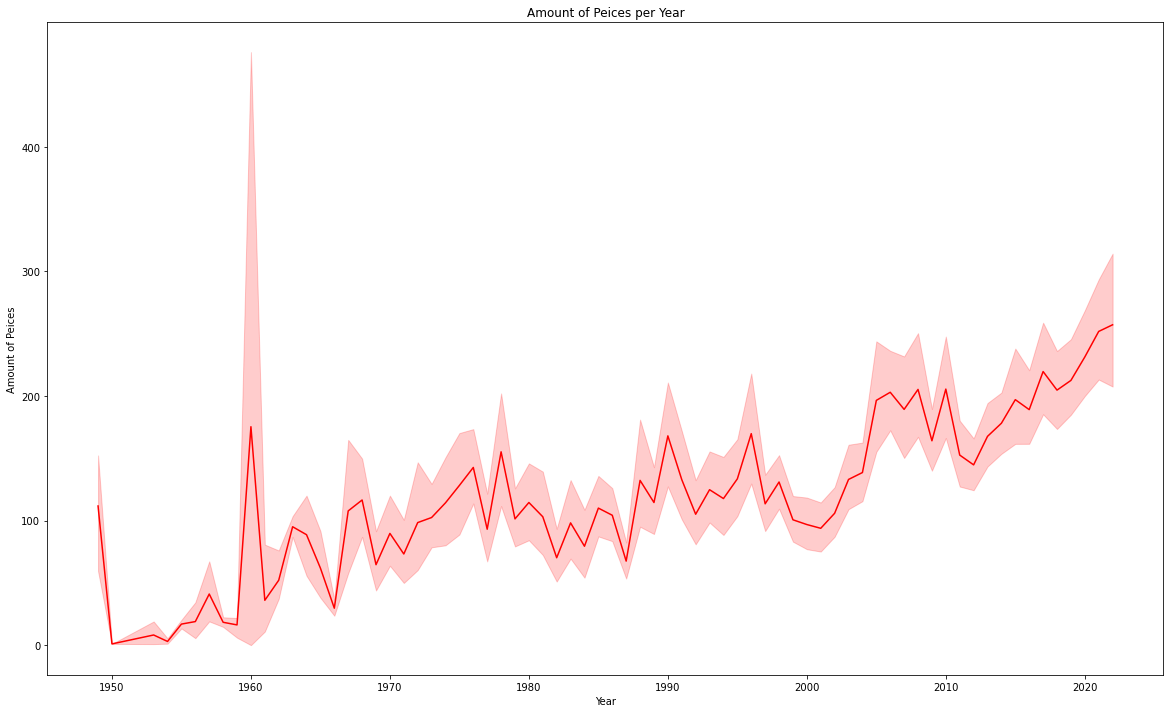

In [33]:
plt.figure(figsize=(20,12))
fig = sns.lineplot(data=df2, x='year', y='num_parts', color='red')
plt.xlabel("Year")
plt.ylabel("Amount of Peices")
plt.title("Amount of Peices per Year") 
plt.show(fig)

Interesting it looks like overall the amount of pieces per set has gotten proportionally larger over time. Though there was a big peak in 1960 that had a lot larger pieces in a set for that time.

## Coclusion

Black is the colour that is most widely used in all of the Lego themes. Also, my perception of the sets getting smaller is false as they have gotten bigger over the years. So let's go over to my Tableau dashboard and see how the Top 10 Colours are used in the Top 10 Themes.